In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import nltk

import matplotlib.pyplot as plt
# import requests
# import urllib.request
from matplotlib import rc
import seaborn as sns

%matplotlib inline
# %matplotlib nbagg
# import mpld3
# mpld3.enable_notebook()
from matplotlib.axis import Axis 
from matplotlib import interactive
interactive(True)
# %matplotlib qt

# sets the width and height of the plots in inches
plt.rcParams['figure.figsize'] = [10, 5]



from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

In [2]:
tripadv=pd.read_csv('tripadvisor.csv')
tripadv.columns = ['Attraction', 
                   'City', 
                   'Posted', 
                   'Visited', 
                   'User_Reviews', 
                   'User_Helpful',
                   'Review_Helpful', 
                   'Rating', 
                   'Text', 
                   'Title', 
                   'Username', 
                   'User_Location']

In [3]:
tripadv.loc[tripadv.Posted=='8-Jul', :]

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Location
13716,Petersen Automotive Museum,Los Angeles,8-Jul,0,33,14,0,5,Robert Petersen published a lot of the magazin...,Great Stop for All,basicgrandpa,"Clifton, Virginia"
13723,Petersen Automotive Museum,Los Angeles,8-Jul,0,698,101,1,5,"I am NOT AT ALL interested in cars, but I thou...",MUCH better than expected,JdeP,London


In [4]:
tripadv['Posted'] = tripadv['Posted'].apply(lambda x: x.zfill(6))

In [5]:
tripadv['Visited'] = tripadv['Visited'].apply(lambda x: x.zfill(6) if x != '' else None)

In [6]:
tripadv['Posted'] = pd.to_datetime(tripadv['Posted'].astype(str), format='%y-%b')

In [7]:
tripadv.loc[tripadv.Visited=='000000', :]

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Location
2023,The Art Institute of Chicago,Chicago,2019-05-01,000000,125,42,0,5,A day is not enough for the beautiful artifact...,A day is not enough...,CyprusEffie,"Larnaca, Cyprus"
2203,The Art Institute of Chicago,Chicago,2018-09-01,000000,98,26,0,5,I spent several hours here and still didn’t se...,Amazing,eightohtwo,"Burlington, Vermont"
2535,The Art Institute of Chicago,Chicago,2019-07-01,000000,46,33,1,5,Superb quality and impossible to take all of i...,Could return many times to this museum,JS19772017,"Kansas City, Kansas"
2695,The Art Institute of Chicago,Chicago,2020-01-01,000000,5,0,0,5,You must visit this Chicago staple. They have ...,Fantastic.,jules,"Chicago, Illinois"
2797,The Art Institute of Chicago,Chicago,2019-09-01,000000,43,9,0,5,This museum has a great collection of art from...,Great Art Museum,AdamB16,"Iowa City, Iowa"
...,...,...,...,...,...,...,...,...,...,...,...,...
36357,The National 9/11 Memorial & Museum,New York City,2020-02-01,000000,2,0,0,5,My party of six included my aging parents. Guy...,"""The Guy""",Jeff Cole,"Indianapolis, Indiana"
36470,The National 9/11 Memorial & Museum,New York City,2020-02-01,000000,159,54,1,5,The memorial is so moving and beautiful So hea...,A moving must see!,jadehardman1983,"Swinton, United Kingdom"
36621,The National 9/11 Memorial & Museum,New York City,2020-03-01,000000,432,1,3,4,The 9/11 Memorial Museum tour helps give peopl...,The Ideal Learning Experience for Out-of-Towners,Richard L. Entrup,"New York City, New York"
36682,The National 9/11 Memorial & Museum,New York City,2020-06-01,000000,35,73,3,5,This was so beautifully done. From outside at ...,Wow,Jana T,NaN


In [8]:
tripadv['Visited'] = pd.to_datetime(tripadv['Visited'].astype(str), format='%y-%b', errors='coerce')

In [9]:
tripadv.loc[2023,]

Attraction                             The Art Institute of Chicago
City                                                        Chicago
Posted                                          2019-05-01 00:00:00
Visited                                                         NaT
User_Reviews                                                    125
User_Helpful                                                     42
Review_Helpful                                                    0
Rating                                                            5
Text              A day is not enough for the beautiful artifact...
Title                                        A day is not enough...
Username                                                CyprusEffie
User_Location                                       Larnaca, Cyprus
Name: 2023, dtype: object

In [10]:
tripadv.shape

(38294, 12)

In [11]:
tripadv.sample(15)

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Location
19754,Freedom Trail,Boston,2019-06-01,2019-05-01,53,7,0,5,As the Freedom trail takes you all over Boston...,Really great way to explore the city,Soph,"London, United Kingdom"
23387,Boston Tea Party Ships & Museum,Boston,2018-04-01,2018-04-01,155,59,0,5,The staff that put on the program was engaging...,Loved the interactive experience,mdw50,Oklahoma
8872,Top of the Rock,New York City,2019-10-01,2019-10-01,269,87,2,4,"I would have given this a 5, but they messed u...",Bucket List Trip,tripplanner99,"Bargersville, Indiana"
37778,Central Park,New York City,2020-01-01,2019-12-01,4,0,0,5,great park plenty to see allow plenty of time ...,park,Leonard A,NaN
3530,The Art Institute of Chicago,Chicago,2018-09-01,2018-07-01,36,5,0,5,The Art Institute had some amazing exhibits to...,Stimulating Exhibits,Analeigh V,"Smithville, Missouri"
8120,Top of the Rock,New York City,2019-07-01,2019-07-01,26,2,1,5,"Great view on 3 different levels, wonderful fo...",Very good! We would come again!,Susan M,"Buffalo, New York"
14681,Petersen Automotive Museum,Los Angeles,2017-02-01,2017-01-01,283,83,0,5,Since my last visit several years ago the Pete...,Love Cars? This is THE Place!,Rogerl53,"Guilderland, New York"
9264,Top of the Rock,New York City,2019-12-01,2019-12-01,2,1,1,4,Loved the view we had from all sides and sever...,Great event,Cheryl N,NaN
33133,Cloud Gate,Chicago,2018-12-01,2018-12-01,82,9,0,4,Trying to get a picture here was a lot easier ...,Busy,Sarah S,"Springfield, Missouri"
16727,The Getty Center,Los Angeles,2018-02-01,2018-01-01,117,42,0,5,Everything about the Getty Centre is exception...,Truly World Class!,Al G,"Ottawa, Canada"


In [12]:
# Split up the location column to grab all possible parts of the location

tripadv_loc = tripadv['User_Location'].str.split(', ', expand = True)
tripadv_loc.columns = ['User_Loc1', 'User_Loc2', 'User_Loc3', 'User_Loc4', 'User_Loc5']

tripadv_loc = tripadv_loc.fillna(value='').apply(lambda x: x.astype(str).str.upper())

tripadv = tripadv.drop(labels='User_Location', axis=1)
tripadv = pd.concat([tripadv, tripadv_loc], axis = 1)

tripadv = tripadv.sort_values(['City', 'Attraction'])
tripadv.sample(20)

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5
13317,Universal Studios Hollywood,Los Angeles,2019-11-01,2019-11-01,223,66,3,5,We visited without kids and it was great fun. ...,Fun even for adults!,Cyngtz,MONTERREY,MEXICO,,,
20486,Freedom Trail,Boston,2019-11-01,2019-11-01,158,78,1,5,To follow the red brick road armed with either...,You have to do this!,Derek B,LEDBURY,UNITED KINGDOM,,,
1135,Millennium Park,Chicago,2019-09-01,2019-09-01,205,112,1,4,Visited the park on the last day of the Jazz f...,Jazz Festival,DaveHen,DUNFERMLINE,UNITED KINGDOM,,,
1201,Millennium Park,Chicago,2020-02-01,2019-03-01,2,1,0,5,I was there maybe 5 years ago and was very imp...,Loved The Bean,Maryann Sulic,,,,,
10447,Griffith Observatory,Los Angeles,2019-01-01,2019-01-01,81,37,0,5,Pretty everything is in the title. Take one af...,Nice ride - great museum - mesmerizing vista,TheSiward,LONDON,UNITED KINGDOM,,,
18442,The Getty Center,Los Angeles,2019-11-01,2019-08-01,7,1,0,5,"The setting of the museum was so very restful,...",A trip to Italy,tlk2018,,,,,
24320,Boston Tea Party Ships & Museum,Boston,2019-09-01,2019-10-01,321,139,0,4,"At $30 odd each this isn’t cheap, but the most...",Better than expected,instoreman,PRESTON,ENGLAND,,,
36812,Central Park,New York City,2019-09-01,2019-06-01,2,0,0,5,many interesting features and great for all ag...,Love the park,Lara S,NEW YORK CITY,NEW YORK,,,
32184,360 Chicago Observation Deck,Chicago,2018-01-01,2018-01-01,1,0,0,5,"I saw this tilt thrill ride video online, I ju...",Had a great experience.,sagpatel27492,,,,,
8843,Top of the Rock,New York City,2019-10-01,2019-10-01,46,29,1,5,I have an awful fear of heights but was persua...,What a view! Overcame fear of heights!,AlexanderKT91,GLASGOW,UNITED KINGDOM,,,


In [13]:
st_abbr = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

from collections import Counter

st_abbr = {k.upper(): v for k, v in st_abbr.items()}
st_abbr

{'ALABAMA': 'AL',
 'ALASKA': 'AK',
 'AMERICAN SAMOA': 'AS',
 'ARIZONA': 'AZ',
 'ARKANSAS': 'AR',
 'CALIFORNIA': 'CA',
 'COLORADO': 'CO',
 'CONNECTICUT': 'CT',
 'DELAWARE': 'DE',
 'DISTRICT OF COLUMBIA': 'DC',
 'FLORIDA': 'FL',
 'GEORGIA': 'GA',
 'GUAM': 'GU',
 'HAWAII': 'HI',
 'IDAHO': 'ID',
 'ILLINOIS': 'IL',
 'INDIANA': 'IN',
 'IOWA': 'IA',
 'KANSAS': 'KS',
 'KENTUCKY': 'KY',
 'LOUISIANA': 'LA',
 'MAINE': 'ME',
 'MARYLAND': 'MD',
 'MASSACHUSETTS': 'MA',
 'MICHIGAN': 'MI',
 'MINNESOTA': 'MN',
 'MISSISSIPPI': 'MS',
 'MISSOURI': 'MO',
 'MONTANA': 'MT',
 'NEBRASKA': 'NE',
 'NEVADA': 'NV',
 'NEW HAMPSHIRE': 'NH',
 'NEW JERSEY': 'NJ',
 'NEW MEXICO': 'NM',
 'NEW YORK': 'NY',
 'NORTH CAROLINA': 'NC',
 'NORTH DAKOTA': 'ND',
 'NORTHERN MARIANA ISLANDS': 'MP',
 'OHIO': 'OH',
 'OKLAHOMA': 'OK',
 'OREGON': 'OR',
 'PENNSYLVANIA': 'PA',
 'PUERTO RICO': 'PR',
 'RHODE ISLAND': 'RI',
 'SOUTH CAROLINA': 'SC',
 'SOUTH DAKOTA': 'SD',
 'TENNESSEE': 'TN',
 'TEXAS': 'TX',
 'UTAH': 'UT',
 'VERMONT': 'VT',
 '

In [14]:
tripadv['User_Loc2'] = tripadv.User_Loc2.replace(st_abbr)
tripadv

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5
0,Boston Tea Party Ships & Museum,Boston,2017-03-01,2017-03-01,360,186,0,5,We stopped over here on our way to the airport...,Entertaining and Educational,nadiag0610,SAN DIEGO,CA,,,
1,Boston Tea Party Ships & Museum,Boston,2017-03-01,2017-03-01,174,17,0,5,Who knew committing treason could be fun? From...,History Comes Alive,1TravelNP,GREENSBORO,NC,,,
2,Boston Tea Party Ships & Museum,Boston,2017-03-01,2017-03-01,31,11,0,5,Loved this. It's great fun and there are some ...,Really well done,Paulrob75,LONDON,UNITED KINGDOM,,,
3,Boston Tea Party Ships & Museum,Boston,2017-03-01,2017-03-01,44,26,0,5,"Well organised tour, staff very knowledgeable ...",Very informative,budd1965,DERBY,UNITED KINGDOM,,,
4,Boston Tea Party Ships & Museum,Boston,2017-03-01,2017-03-01,21,2,0,5,This museum is very interactive and extremely ...,Wow!,Kara B,RICHMOND,TX,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34775,Top of the Rock,New York City,2019-10-01,2019-10-01,115,79,1,5,"Visited at 9.30 pm Saturday evening, brilliant...","Great at night,",karen m,STOCKPORT,UNITED KINGDOM,,,
34776,Top of the Rock,New York City,2019-10-01,2019-10-01,19,6,0,4,We went at night time the wait time was not to...,Amazing at night,X5657DYcaroll,DUBLIN,IRELAND,,,
34777,Top of the Rock,New York City,2019-10-01,2019-10-01,242,92,1,5,"We had tickets right away for 8am one morning,...",Really depends on the weather!,AnnmarieK,SAN FRANCISCO,CA,,,
34778,Top of the Rock,New York City,2019-10-01,2019-10-01,30,2,1,4,Beautiful views of NYC. Somewhat pricey for wh...,Top of the Rock,Courtlee86,ST. JOHN'S,CANADA,,,


## Rating Stats

In [16]:
# Simple stats on whether reviews for Boston were marked helpful

tripadv[tripadv['City']=='Chicago'].groupby('Attraction').agg(['sum', 'min', 'max', 'mean', 'std'])['Rating']

,sum,min,max,mean,std
Attraction,,,,,
360 Chicago Observation Deck,8954,1,5,4.501760,0.830518
Cloud Gate,9264,1,5,4.632000,0.664678
Millennium Park,9348,1,5,4.674000,0.592368
Museum of Science and Industry,9420,1,5,4.710000,0.687849
The Art Institute of Chicago,9693,1,5,4.858647,0.459022


- Below are ratings comparisons between attractions
- The comparisons are between reviews giving 5 stars to the attraction and reviews giving anything less than 4 stars

In [17]:
# change the ratings 1, 2, 3 to 'poor' since there are so few of them

ta_chng_rat = tripadv.replace({'Rating': [1, 2, 3]}, 'Poor')
ta_chng_rat.sample(20)

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5
24398,Boston Tea Party Ships & Museum,Boston,2019-11-01,2019-10-01,27,11,0,4,We went on the full re-enactment tour at the B...,"Fun Activity, a little pricey",Forest_Runner2,FOREST,VA,,,
17614,The Getty Center,Los Angeles,2018-11-01,2018-10-01,7,0,0,4,Ate a typical breakfast combo. Quick service a...,Nice Deli,dansan9,,,,,
21064,Museum of Fine Arts,Boston,2017-06-01,2017-06-01,408,164,0,5,The Boston Museum of Fine Arts is one of Ameri...,Outstanding museum and easy to visit,Travel715,,,,,
35631,The National 9/11 Memorial & Museum,New York City,2019-12-01,2019-06-01,14,5,0,5,"When you travel deep, deep down into the 9/11 ...",The Sky Was Never So Blue,Simcha,READING,PA,,,
32316,360 Chicago Observation Deck,Chicago,2018-06-01,2017-07-01,202,54,0,5,This is an awesome place to photograph Chicago...,Photographers paradise,Sudhir T,PUNE,INDIA,,,
12626,Universal Studios Hollywood,Los Angeles,2019-07-01,2019-07-01,24,2,1,5,Highly recommend the VIP EXPERIENCE TOUR.. Tou...,Another Bucket List Item,Bill B,BUDERIM,AUSTRALIA,,,
1510,Millennium Park,Chicago,2019-09-01,2019-09-01,91,9,0,5,"You can see the cloud, crown fountain, eat and...",Park with great art,646jenniferu,TEHACHAPI,CA,,,
23753,Boston Tea Party Ships & Museum,Boston,2018-09-01,2018-08-01,97,21,0,5,A great ( very enjoyable) interactive history ...,A Wonderful Whole family History Experience!,Paul B,SOUTHINGTON,CT,,,
17829,The Getty Center,Los Angeles,2019-01-01,2019-01-01,261,50,0,5,There is so much to see with just in the exhib...,A Day Long Excursion,DABSMO,LONDON,UNITED KINGDOM,,,
33319,Cloud Gate,Chicago,2019-03-01,2019-03-01,142,21,0,5,Obligatory very cool pictures here. We were th...,Quintessential Chicago landmark,ellentambo,WESTERVILLE,OH,,,


# Analyzing Chicago

### Analyzing by Rating (5 stars, 4 stars, Poor)

In [21]:
ta_5vspoor = ta_chng_rat[(ta_chng_rat['City']=='Chicago') ]

ta_5vspoor.sample(20)

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5
2240,The Art Institute of Chicago,Chicago,2019-07-01,2019-07-01,6,0,0,5,Amazing collections of arts/ I have been to th...,Amazing collections!,Toshi M,ATLANTA,GA,,,
34332,Cloud Gate,Chicago,2020-03-01,2020-03-01,214,113,0,Poor,I guess this is art but it was fairly boring. ...,So it's like a giant bean?,GREG L,NASHVILLE,TN,,,
32573,Cloud Gate,Chicago,2018-08-01,2018-08-01,32,11,0,4,I didn't think I'd be impressed by 'The Bean' ...,A magnet for tourists,Fabia C,LONDON,UNITED KINGDOM,,,
30613,Museum of Science and Industry,Chicago,2019-08-01,2019-08-01,36,17,0,5,If you are in Chicago this museum is a must se...,Awesome museum,Elizabeth V,RIO DE JANEIRO,BRAZIL,,,
30571,Museum of Science and Industry,Chicago,2019-07-01,2019-07-01,2,0,0,5,"I like everything, very recomendable!! I wish ...",Sue is Big,Los Mariachiles R,PUERTO VALLARTA,MEXICO,,,
28658,Museum of Science and Industry,Chicago,2018-07-01,2018-07-01,537,55,0,5,Visited thr REAL 505 U Boat. This is one if tg...,The best. U505,uchype,DELRAY BEACH,FL,,,
3357,The Art Institute of Chicago,Chicago,2018-10-01,2018-10-01,20,12,0,5,Must see if you have any interest in art. Huge...,Outstanding art museum,Emily4518,LONG BEACH,CA,,,
2806,The Art Institute of Chicago,Chicago,2018-09-01,2018-09-01,262,155,1,5,The Chicago Art Institute is one of this natio...,Great as always,John_Schunhoff,LOS ANGELES,CA,,,
30221,360 Chicago Observation Deck,Chicago,2018-11-01,2018-11-01,1,0,0,5,Will recommend and plan on revisiting with my ...,Breathtaking.,Jordan Octavio R,CHICAGO,IL,,,
30681,Museum of Science and Industry,Chicago,2019-08-01,2019-08-01,"1,634",101,0,5,I asked my grandson where he would like to go ...,#1 Requested Attraction,Drgole,HASTINGS,MI,,,


## Using Word Lemmatizer to Analyze Text Data

### Single Word Analysis

- 5 Star Analysis

In [22]:
lemmatizer= WordNetLemmatizer()
stop_filters = stopwords.words('english') + list(string.punctuation) + ['chicago', '’', "n't", "'s", 'u', 'get', "'m", 
                                                                        'also', '...' ,"'", '`', '``', '-', '"', "''", '""']

# Word Count

corpus_5star = ' '.join(ta_5vspoor[ta_5vspoor['Rating']==5]['Text']).lower()
tokens_5star = [lemmatizer.lemmatize(tokens) for tokens in word_tokenize(corpus_5star) if tokens not in stop_filters]

fdist_5star = FreqDist(tokens_5star)
fdist_5star.most_common(50)

[('see', 2975),
 ('museum', 2663),
 ('great', 2552),
 ('time', 2347),
 ('art', 2257),
 ('park', 1999),
 ('visit', 1920),
 ('day', 1890),
 ('exhibit', 1786),
 ('view', 1657),
 ('place', 1552),
 ('bean', 1450),
 ('one', 1424),
 ('go', 1352),
 ('city', 1228),
 ('amazing', 1048),
 ('fun', 1036),
 ('many', 1013),
 ('lot', 990),
 ('well', 988),
 ('experience', 979),
 ('much', 974),
 ('take', 972),
 ('must', 970),
 ('around', 950),
 ('worth', 940),
 ('hour', 885),
 ('really', 878),
 ('beautiful', 842),
 ('kid', 792),
 ('would', 787),
 ('people', 778),
 ('collection', 777),
 ('went', 717),
 ('like', 708),
 ('picture', 706),
 ('thing', 673),
 ('loved', 669),
 ('enjoyed', 668),
 ('good', 651),
 ('photo', 647),
 ('tilt', 645),
 ('cloud', 642),
 ('institute', 635),
 ('enjoy', 630),
 ('area', 625),
 ('year', 614),
 ('walk', 607),
 ('love', 603),
 ('best', 592)]

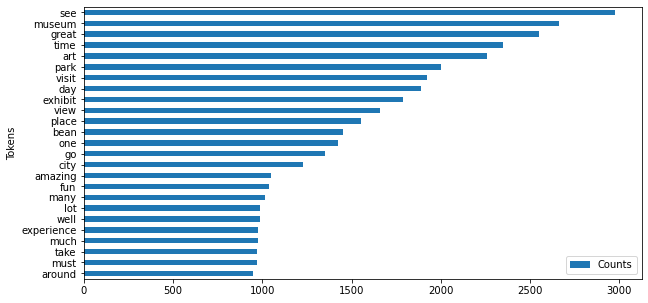

In [23]:
# Graph of Word Count

fdist_5star_graph = pd.DataFrame(fdist_5star.most_common(25), columns=['Tokens', 'Counts']).set_index('Tokens').plot(kind='barh')
fdist_5star_graph.invert_yaxis()

- 4 Star Analysis

In [24]:
corpus_4star = ' '.join(ta_5vspoor[ta_5vspoor['Rating']==4]['Text']).lower()
tokens_4star = [lemmatizer.lemmatize(tokens) for tokens in word_tokenize(corpus_4star) if tokens not in stop_filters]

fdist_4star = FreqDist(tokens_4star)
fdist_4star.most_common(50)

[('see', 683),
 ('view', 556),
 ('park', 546),
 ('great', 529),
 ('time', 490),
 ('bean', 465),
 ('visit', 451),
 ('museum', 448),
 ('day', 399),
 ('place', 338),
 ('exhibit', 338),
 ('city', 335),
 ('go', 333),
 ('around', 310),
 ('art', 307),
 ('tilt', 300),
 ('take', 300),
 ('would', 289),
 ('people', 284),
 ('nice', 284),
 ('one', 276),
 ('lot', 275),
 ('really', 274),
 ('good', 272),
 ('worth', 261),
 ('fun', 249),
 ('picture', 248),
 ('experience', 224),
 ('area', 222),
 ('photo', 221),
 ('like', 211),
 ('went', 210),
 ('well', 203),
 ('cloud', 201),
 ('many', 197),
 ('walk', 197),
 ('kid', 192),
 ('ticket', 191),
 ('hour', 190),
 ('cool', 184),
 ('must', 183),
 ('line', 177),
 ('much', 175),
 ('amazing', 174),
 ('enjoyed', 171),
 ('gate', 170),
 ('thing', 167),
 ('could', 160),
 ('beautiful', 155),
 ('interesting', 155)]

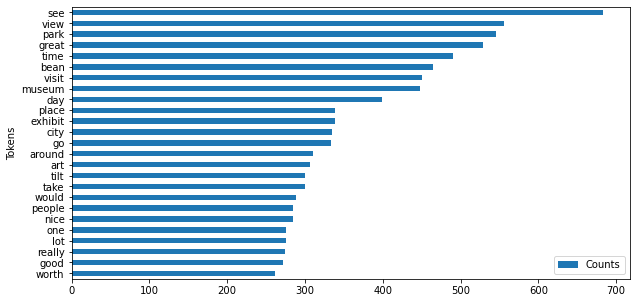

In [25]:
fdist_4star_graph = pd.DataFrame(fdist_4star.most_common(25), columns=['Tokens', 'Counts']).set_index('Tokens').plot(kind='barh')
fdist_4star_graph.invert_yaxis()

- Poor Rating Analysis

In [26]:
corpus_poor = ' '.join(ta_5vspoor[ta_5vspoor['Rating']=='Poor']['Text']).lower()
tokens_poor = [lemmatizer.lemmatize(tokens) for tokens in word_tokenize(corpus_poor) if tokens not in stop_filters]

fdist_poor = FreqDist(tokens_poor)
fdist_poor.most_common(50)

[('museum', 235),
 ('see', 213),
 ('view', 200),
 ('would', 176),
 ('time', 167),
 ('exhibit', 166),
 ('go', 157),
 ('tilt', 154),
 ('one', 132),
 ('day', 130),
 ('people', 125),
 ('ticket', 124),
 ('park', 123),
 ('line', 120),
 ('kid', 118),
 ('great', 117),
 ('really', 114),
 ('like', 109),
 ('much', 108),
 ('bean', 108),
 ('place', 104),
 ('visit', 103),
 ('experience', 94),
 ('city', 92),
 ('take', 92),
 ('good', 90),
 ('nice', 88),
 ('picture', 88),
 ('around', 87),
 ('thing', 82),
 ('lot', 82),
 ('worth', 82),
 ('art', 82),
 ('could', 79),
 ('extra', 73),
 ('u', 72),
 ('staff', 71),
 ('interesting', 71),
 ('money', 71),
 ('went', 71),
 ('long', 69),
 ('photo', 68),
 ('wait', 68),
 ('many', 68),
 ('hour', 66),
 ('pay', 65),
 ('cool', 65),
 ('price', 63),
 ('got', 60),
 ('better', 58)]

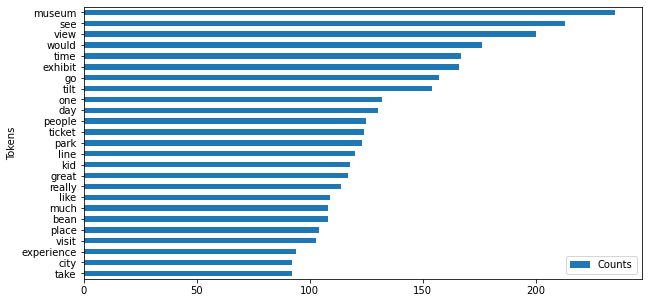

In [27]:
fdist_poor_graph = pd.DataFrame(fdist_poor.most_common(25), columns=['Tokens', 'Counts']).set_index('Tokens').plot(kind='barh')
fdist_poor_graph.invert_yaxis()

- We can see that most of the reviews that gave 3 or fewer stars mentioned tours the most

### Bigram Analysis

- 5 Star Analysis

In [28]:
corpus_5star = ' '.join(ta_5vspoor[ta_5vspoor['Rating']==5]['Text']).lower()
tokens_5star = [lemmatizer.lemmatize(tokens) for tokens in word_tokenize(corpus_5star) if tokens not in stop_filters]

bigram_5star = list(nltk.bigrams(tokens_5star))
fdist_bi_5star = FreqDist(bigram_5star)
fdist_bi_5star.most_common(50)

[(('art', 'institute'), 552),
 (('cloud', 'gate'), 515),
 (('millennium', 'park'), 487),
 (('must', 'see'), 411),
 (('great', 'place'), 291),
 (('much', 'see'), 253),
 (('well', 'worth'), 228),
 (('highly', 'recommend'), 207),
 (('art', 'museum'), 202),
 (('observation', 'deck'), 190),
 (('view', 'city'), 190),
 (('coal', 'mine'), 184),
 (('great', 'time'), 182),
 (('year', 'old'), 177),
 (('take', 'picture'), 171),
 (('great', 'view'), 165),
 (('worth', 'visit'), 163),
 (('one', 'best'), 149),
 (('place', 'visit'), 148),
 (('walk', 'around'), 148),
 (('see', 'everything'), 146),
 (('make', 'sure'), 140),
 (('willis', 'tower'), 131),
 (('really', 'enjoyed'), 128),
 (('science', 'industry'), 128),
 (('gift', 'shop'), 125),
 (('go', 'back'), 123),
 (('first', 'time'), 122),
 (('must', 'visit'), 122),
 (('spend', 'day'), 121),
 (('great', 'experience'), 120),
 (('piece', 'art'), 118),
 (('lake', 'michigan'), 117),
 (('would', 'recommend'), 115),
 (('something', 'everyone'), 115),
 (('muse

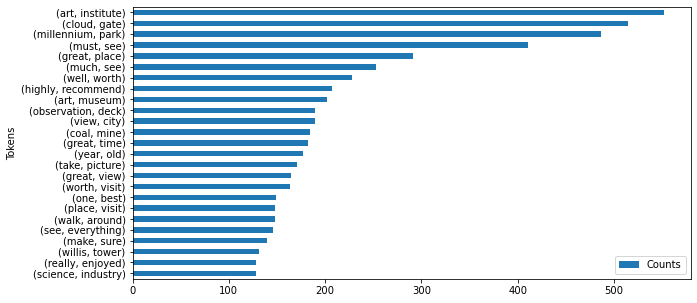

In [29]:
# Graph of 5 Star Bigram

fdist_bi_5star_graph = pd.DataFrame(fdist_bi_5star.most_common(25), columns=['Tokens', 'Counts']).set_index('Tokens').plot(kind='barh')
fdist_bi_5star_graph.invert_yaxis()

- 4 Star Analysis

In [30]:
corpus_4star = ' '.join(ta_5vspoor[ta_5vspoor['Rating']==4]['Text']).lower()
tokens_4star = [lemmatizer.lemmatize(tokens) for tokens in word_tokenize(corpus_4star) if tokens not in stop_filters]

bigram_4star = list(nltk.bigrams(tokens_4star))
fdist_bi_4star = FreqDist(bigram_4star)
fdist_bi_4star.most_common(50)

[(('cloud', 'gate'), 161),
 (('millennium', 'park'), 130),
 (('observation', 'deck'), 108),
 (('take', 'picture'), 75),
 (('must', 'see'), 75),
 (('art', 'institute'), 68),
 (('view', 'city'), 67),
 (('great', 'place'), 67),
 (('worth', 'visit'), 61),
 (('walk', 'around'), 61),
 (('great', 'view'), 58),
 (('willis', 'tower'), 56),
 (('well', 'worth'), 47),
 (('coal', 'mine'), 40),
 (('lot', 'people'), 36),
 (('bean', '”'), 35),
 (('make', 'sure'), 34),
 (('would', 'recommend'), 34),
 (('millenium', 'park'), 34),
 (('definitely', 'worth'), 33),
 (('gift', 'shop'), 33),
 (('“', 'bean'), 33),
 (('see', 'bean'), 32),
 (('take', 'photo'), 31),
 (('tilt', 'experience'), 30),
 (('really', 'enjoyed'), 28),
 (('view', 'amazing'), 28),
 (('great', 'photo'), 28),
 (('place', 'visit'), 27),
 (('pretty', 'cool'), 26),
 (('clear', 'day'), 26),
 (('lake', 'michigan'), 26),
 (('lot', 'see'), 26),
 (('photo', 'opportunity'), 25),
 (('view', 'great'), 24),
 (('even', 'though'), 24),
 (('thing', 'see'), 

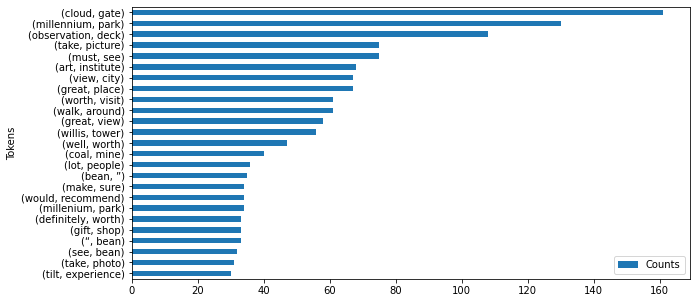

In [31]:
# Graph of 4 Star Bigram

fdist_bi_4star_graph = pd.DataFrame(fdist_bi_4star.most_common(25), columns=['Tokens', 'Counts']).set_index('Tokens').plot(kind='barh')
fdist_bi_4star_graph.invert_yaxis()

- Poor Rating Analysis

In [32]:
corpus_poor = ' '.join(ta_5vspoor[ta_5vspoor['Rating']=='Poor']['Text']).lower()
tokens_poor = [lemmatizer.lemmatize(tokens) for tokens in word_tokenize(corpus_poor) if tokens not in stop_filters]

bigram_poor = list(nltk.bigrams(tokens_poor))
fdist_bi_poor = FreqDist(bigram_poor)
fdist_bi_poor.most_common(50)

[(('millennium', 'park'), 26),
 (('willis', 'tower'), 25),
 (('observation', 'deck'), 25),
 (('art', 'institute'), 25),
 (('cloud', 'gate'), 24),
 (('take', 'picture'), 21),
 (('would', 'recommend'), 20),
 (('tilt', 'experience'), 19),
 (('great', 'view'), 19),
 (('city', 'pas'), 18),
 (('view', 'city'), 17),
 (('view', 'great'), 15),
 (('pay', 'extra'), 15),
 (('must', 'see'), 15),
 (('coal', 'mine'), 15),
 (('many', 'exhibit'), 15),
 (('year', 'ago'), 14),
 (('science', 'industry'), 14),
 (('year', 'old'), 13),
 (('per', 'person'), 13),
 (('long', 'line'), 12),
 (('worth', 'money'), 12),
 (('gift', 'shop'), 12),
 (('wait', 'line'), 12),
 (('line', 'long'), 11),
 (('purchased', 'ticket'), 11),
 (('many', 'people'), 11),
 (('could', 'see'), 11),
 (('see', 'bean'), 11),
 (('much', 'better'), 10),
 (('worth', 'visit'), 10),
 (('really', 'cool'), 10),
 (('science', 'museum'), 10),
 (('much', 'see'), 9),
 (('early', 'morning'), 9),
 (('lot', 'people'), 9),
 (('people', 'around'), 9),
 (('p

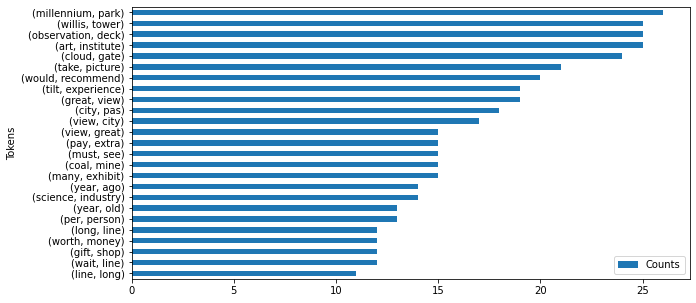

In [33]:
# Graph of Poor Bigram

fdist_bi_poor_graph = pd.DataFrame(fdist_bi_poor.most_common(25), columns=['Tokens', 'Counts']).set_index('Tokens').plot(kind='barh')
fdist_bi_poor_graph.invert_yaxis()

In [34]:
bigram_words_5star = [tup[0] for tup in fdist_bi_5star.most_common(50)]
bigram_words_5star

[('art', 'institute'),
 ('cloud', 'gate'),
 ('millennium', 'park'),
 ('must', 'see'),
 ('great', 'place'),
 ('much', 'see'),
 ('well', 'worth'),
 ('highly', 'recommend'),
 ('art', 'museum'),
 ('observation', 'deck'),
 ('view', 'city'),
 ('coal', 'mine'),
 ('great', 'time'),
 ('year', 'old'),
 ('take', 'picture'),
 ('great', 'view'),
 ('worth', 'visit'),
 ('one', 'best'),
 ('place', 'visit'),
 ('walk', 'around'),
 ('see', 'everything'),
 ('make', 'sure'),
 ('willis', 'tower'),
 ('really', 'enjoyed'),
 ('science', 'industry'),
 ('gift', 'shop'),
 ('go', 'back'),
 ('first', 'time'),
 ('must', 'visit'),
 ('spend', 'day'),
 ('great', 'experience'),
 ('piece', 'art'),
 ('lake', 'michigan'),
 ('would', 'recommend'),
 ('something', 'everyone'),
 ('museum', 'science'),
 ('“', 'bean'),
 ('bean', '”'),
 ('one', 'day'),
 ('thing', 'see'),
 ('millenium', 'park'),
 ('whole', 'day'),
 ('definitely', 'worth'),
 ('ice', 'skating'),
 ('every', 'time'),
 ('great', 'photo'),
 ('special', 'exhibit'),
 ('wo

In [35]:
bigram_words_4star = [tup[0] for tup in fdist_bi_4star.most_common(50)]
bigram_words_4star

[('cloud', 'gate'),
 ('millennium', 'park'),
 ('observation', 'deck'),
 ('take', 'picture'),
 ('must', 'see'),
 ('art', 'institute'),
 ('view', 'city'),
 ('great', 'place'),
 ('worth', 'visit'),
 ('walk', 'around'),
 ('great', 'view'),
 ('willis', 'tower'),
 ('well', 'worth'),
 ('coal', 'mine'),
 ('lot', 'people'),
 ('bean', '”'),
 ('make', 'sure'),
 ('would', 'recommend'),
 ('millenium', 'park'),
 ('definitely', 'worth'),
 ('gift', 'shop'),
 ('“', 'bean'),
 ('see', 'bean'),
 ('take', 'photo'),
 ('tilt', 'experience'),
 ('really', 'enjoyed'),
 ('view', 'amazing'),
 ('great', 'photo'),
 ('place', 'visit'),
 ('pretty', 'cool'),
 ('clear', 'day'),
 ('lake', 'michigan'),
 ('lot', 'see'),
 ('photo', 'opportunity'),
 ('view', 'great'),
 ('even', 'though'),
 ('thing', 'see'),
 ('see', 'city'),
 ('360', 'observation'),
 ('go', 'early'),
 ('many', 'people'),
 ('go', 'back'),
 ('highly', 'recommend'),
 ('good', 'place'),
 ('piece', 'art'),
 ('nice', 'park'),
 ('time', 'visit'),
 ('94th', 'floor'

In [36]:
bigram_words_poor = [tup[0] for tup in fdist_bi_poor.most_common(50)]
bigram_words_poor

[('millennium', 'park'),
 ('willis', 'tower'),
 ('observation', 'deck'),
 ('art', 'institute'),
 ('cloud', 'gate'),
 ('take', 'picture'),
 ('would', 'recommend'),
 ('tilt', 'experience'),
 ('great', 'view'),
 ('city', 'pas'),
 ('view', 'city'),
 ('view', 'great'),
 ('pay', 'extra'),
 ('must', 'see'),
 ('coal', 'mine'),
 ('many', 'exhibit'),
 ('year', 'ago'),
 ('science', 'industry'),
 ('year', 'old'),
 ('per', 'person'),
 ('long', 'line'),
 ('worth', 'money'),
 ('gift', 'shop'),
 ('wait', 'line'),
 ('line', 'long'),
 ('purchased', 'ticket'),
 ('many', 'people'),
 ('could', 'see'),
 ('see', 'bean'),
 ('much', 'better'),
 ('worth', 'visit'),
 ('really', 'cool'),
 ('science', 'museum'),
 ('much', 'see'),
 ('early', 'morning'),
 ('lot', 'people'),
 ('people', 'around'),
 ('park', 'nice'),
 ('millenium', 'park'),
 ('art', 'piece'),
 ('ice', 'skating'),
 ('food', 'court'),
 ('museum', 'science'),
 ('special', 'exhibit'),
 ('bought', 'ticket'),
 ('taking', 'picture'),
 ('wait', 'elevator'),
 

In [37]:
bigram_common_words = list(set(bigram_words_5star).intersection(bigram_words_poor))
bigram_common_words = list(set(bigram_common_words).intersection(bigram_words_4star))
bigram_common_words

[('worth', 'visit'),
 ('willis', 'tower'),
 ('millennium', 'park'),
 ('art', 'institute'),
 ('view', 'city'),
 ('gift', 'shop'),
 ('great', 'view'),
 ('must', 'see'),
 ('take', 'picture'),
 ('observation', 'deck'),
 ('would', 'recommend'),
 ('cloud', 'gate'),
 ('coal', 'mine'),
 ('millenium', 'park')]

In [38]:
words_5star_count = [tup for tup in fdist_bi_5star.most_common(50) if tup[0] in bigram_common_words]
print(len(words_5star_count))

words_5star_count_df = pd.DataFrame(words_5star_count, columns = ['Words', '5Star_Count'])
words_5star_count_df

14


,Words,5Star_Count
0,"(art, institute)",552
1,"(cloud, gate)",515
2,"(millennium, park)",487
3,"(must, see)",411
4,"(observation, deck)",190
5,"(view, city)",190
6,"(coal, mine)",184
7,"(take, picture)",171
8,"(great, view)",165
9,"(worth, visit)",163


In [39]:
words_4star_count = [tup for tup in fdist_bi_4star.most_common(50) if tup[0] in bigram_common_words]
print(len(words_4star_count))

words_4star_count_df = pd.DataFrame(words_4star_count, columns = ['Words', '4Star_Count'])
words_4star_count_df

14


,Words,4Star_Count
0,"(cloud, gate)",161
1,"(millennium, park)",130
2,"(observation, deck)",108
3,"(take, picture)",75
4,"(must, see)",75
5,"(art, institute)",68
6,"(view, city)",67
7,"(worth, visit)",61
8,"(great, view)",58
9,"(willis, tower)",56


In [40]:
words_poor_count = [tup for tup in fdist_bi_poor.most_common(50) if tup[0] in bigram_common_words]
print(len(words_poor_count))

words_poor_count_df = pd.DataFrame(words_poor_count, columns = ['Words', 'Poor_Count'])
words_poor_count_df

14


,Words,Poor_Count
0,"(millennium, park)",26
1,"(willis, tower)",25
2,"(observation, deck)",25
3,"(art, institute)",25
4,"(cloud, gate)",24
5,"(take, picture)",21
6,"(would, recommend)",20
7,"(great, view)",19
8,"(view, city)",17
9,"(must, see)",15


In [74]:
from functools import reduce

dfs = [words_5star_count_df, words_4star_count_df, words_poor_count_df]

combined_words_df = reduce(lambda left,right: pd.merge(left,right,on='Words'), dfs)
combined_words_df

,Words,5Star_Count,4Star_Count,Poor_Count
0,"(art, institute)",552,68,25
1,"(cloud, gate)",515,161,24
2,"(millennium, park)",487,130,26
3,"(must, see)",411,75,15
4,"(observation, deck)",190,108,25
5,"(view, city)",190,67,17
6,"(coal, mine)",184,40,15
7,"(take, picture)",171,75,21
8,"(great, view)",165,58,19
9,"(worth, visit)",163,61,10


In [75]:
count_5star_ttl = len(ta_5vspoor[(ta_5vspoor['Rating']==5)]['Attraction'])
count_5star_ttl

7577

In [76]:
count_4star_ttl = len(ta_5vspoor[(ta_5vspoor['Rating']==4)]['Attraction'])
count_4star_ttl

1803

In [77]:
count_poor_ttl = len(ta_5vspoor[(ta_5vspoor['Rating']=='Poor')]['Attraction'])
count_poor_ttl

604

In [78]:
combined_words_df[['5Star_Count']] = combined_words_df[['5Star_Count']]/count_5star_ttl
combined_words_df[['4Star_Count']] = combined_words_df[['4Star_Count']]/count_4star_ttl
combined_words_df[['Poor_Count']] = combined_words_df[['Poor_Count']]/count_poor_ttl
combined_words_df

,Words,5Star_Count,4Star_Count,Poor_Count
0,"(art, institute)",0.072852,0.037715,0.041391
1,"(cloud, gate)",0.067969,0.089296,0.039735
2,"(millennium, park)",0.064273,0.072102,0.043046
3,"(must, see)",0.054243,0.041597,0.024834
4,"(observation, deck)",0.025076,0.059900,0.041391
5,"(view, city)",0.025076,0.037160,0.028146
6,"(coal, mine)",0.024284,0.022185,0.024834
7,"(take, picture)",0.022568,0.041597,0.034768
8,"(great, view)",0.021776,0.032169,0.031457
9,"(worth, visit)",0.021512,0.033833,0.016556


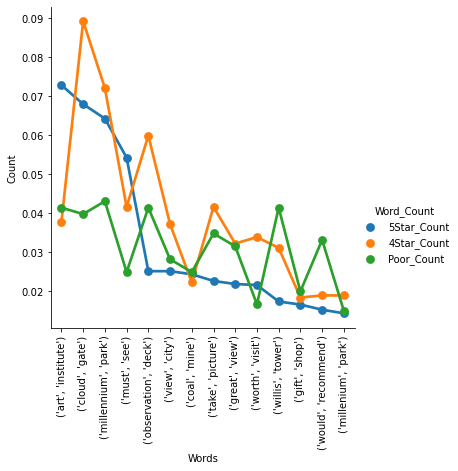

<Figure size 720x360 with 0 Axes>

In [48]:
combined_words_df_plot = combined_words_df.melt('Words', var_name='Word_Count', value_name = 'Count')
combined_words_df_plot = sns.catplot(x="Words", y="Count", hue='Word_Count',
                                     data=combined_words_df_plot, kind='point', 
#                                      alpha = 0.5,
                                     plot_kws=dict(edgecolor="white", linewidth=2.5, alpha=0.3))
plt.figure(figsize=(10,5))
combined_words_df_plot.set_xticklabels(rotation='vertical', fontsize=10)
plt.show()

In [49]:
list(set(bigram_words_5star) - set(bigram_words_4star) - set(bigram_words_poor))

[('work', 'art'),
 ('whole', 'day'),
 ('great', 'experience'),
 ('something', 'everyone'),
 ('great', 'time'),
 ('one', 'day'),
 ('must', 'visit'),
 ('art', 'museum'),
 ('every', 'time'),
 ('see', 'everything'),
 ('spend', 'day'),
 ('first', 'time'),
 ('one', 'best')]

In [50]:
list(set(bigram_words_4star) - set(bigram_words_5star) - set(bigram_words_poor))

[('clear', 'day'),
 ('sunny', 'day'),
 ('360', 'observation'),
 ('see', 'city'),
 ('good', 'place'),
 ('photo', 'opportunity'),
 ('lot', 'see'),
 ('94th', 'floor'),
 ('go', 'early'),
 ('nice', 'park'),
 ('view', 'amazing'),
 ('navy', 'pier'),
 ('take', 'photo'),
 ('pretty', 'cool'),
 ('even', 'though')]

In [51]:
# even taking 'u' and "u" out with the lemmatizer does not actually take the letter out

list(set(bigram_words_poor) - set(bigram_words_4star) - set(bigram_words_5star))

[('line', 'long'),
 ('long', 'line'),
 ('year', 'ago'),
 ('really', 'cool'),
 ('bought', 'ticket'),
 ('taking', 'picture'),
 ('science', 'museum'),
 ('much', 'better'),
 ('wait', 'time'),
 ('wait', 'elevator'),
 ('ticket', 'online'),
 ('waste', 'money'),
 ('many', 'exhibit'),
 ('wait', 'line'),
 ('worth', 'money'),
 ('purchased', 'ticket'),
 ('could', 'see'),
 ('pay', 'extra'),
 ('early', 'morning'),
 ('park', 'nice'),
 ('food', 'court'),
 ('per', 'person'),
 ('people', 'around'),
 ('art', 'piece')]

# Trigram Analysis

In [52]:
# 5 Star Analysis

trigram_5star = list(nltk.trigrams(tokens_5star))
fdist_tri_5star = FreqDist(trigram_5star)
fdist_tri_5star.most_common(50)

[(('museum', 'science', 'industry'), 112),
 (('“', 'bean', '”'), 110),
 (('360', 'observation', 'deck'), 67),
 (('cloud', 'gate', 'bean'), 57),
 (('well', 'worth', 'visit'), 52),
 (('visit', 'art', 'institute'), 47),
 (('great', 'place', 'visit'), 45),
 (('one', 'best', 'museum'), 42),
 (('spend', 'whole', 'day'), 41),
 (('great', 'view', 'city'), 37),
 (('great', 'photo', 'opportunity'), 37),
 (('could', 'spend', 'day'), 36),
 (('could', 'easily', 'spend'), 35),
 (('ice', 'skating', 'rink'), 33),
 (('definitely', 'worth', 'visit'), 32),
 (('coal', 'mine', 'tour'), 32),
 (('maggie', 'daley', 'park'), 30),
 (('view', 'lake', 'michigan'), 29),
 (('would', 'highly', 'recommend'), 29),
 (('la', 'grande', 'jatte'), 29),
 (('tree', 'around', 'world'), 28),
 (('art', 'museum', 'world'), 27),
 (('bean', 'cloud', 'gate'), 26),
 (('many', 'thing', 'see'), 26),
 (('christmas', 'tree', 'around'), 26),
 (('still', 'see', 'everything'), 26),
 (('thorne', 'miniature', 'room'), 26),
 (('wait', 'go', '

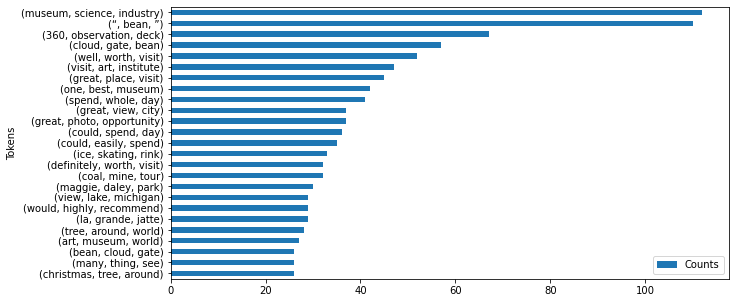

In [53]:
# Graph of 5 Star Trigram

fdist_tri_5star_graph = pd.DataFrame(fdist_tri_5star.most_common(25), columns=['Tokens', 'Counts']).set_index('Tokens').plot(kind='barh')
fdist_tri_5star_graph.invert_yaxis()

In [54]:
# 4 Star Analysis

trigram_4star = list(nltk.trigrams(tokens_4star))
fdist_tri_4star = FreqDist(trigram_4star)
fdist_tri_4star.most_common(50)

[(('“', 'bean', '”'), 31),
 (('360', 'observation', 'deck'), 21),
 (('great', 'view', 'city'), 18),
 (('well', 'worth', 'visit'), 17),
 (('cloud', 'gate', 'bean'), 16),
 (('bean', 'cloud', 'gate'), 14),
 (('cloud', 'gate', 'aka'), 11),
 (('definitely', 'worth', 'visit'), 10),
 (('gate', 'aka', 'bean'), 10),
 (('museum', 'science', 'industry'), 10),
 (('would', 'definitely', 'recommend'), 9),
 (('visit', 'observation', 'deck'), 9),
 (('visit', 'cloud', 'gate'), 9),
 (('great', 'photo', 'opportunity'), 9),
 (('see', 'cloud', 'gate'), 8),
 (('great', 'way', 'spend'), 8),
 (('buy', 'ticket', 'online'), 7),
 (('staff', 'friendly', 'helpful'), 7),
 (('360', 'degree', 'view'), 7),
 (('millennium', 'park', 'bean'), 7),
 (('sir', 'anish', 'kapoor'), 7),
 (('park', 'cloud', 'gate'), 7),
 (('visit', 'art', 'institute'), 7),
 (('see', 'millennium', 'park'), 7),
 (('cloud', 'gate', 'sculpture'), 7),
 (('place', 'walk', 'around'), 7),
 (('“', 'tilt', '”'), 6),
 (('nice', 'view', 'city'), 6),
 (('aro

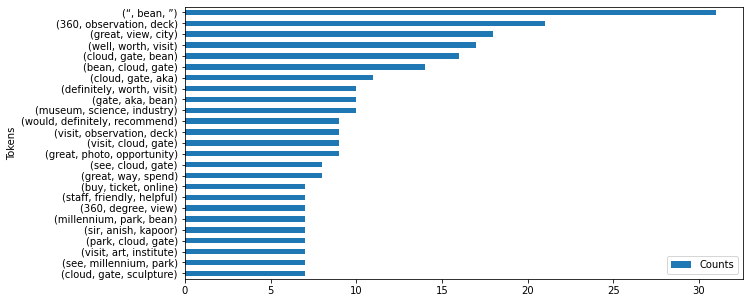

In [55]:
# Graph of 4 Star Trigram

fdist_tri_4star_graph = pd.DataFrame(fdist_tri_4star.most_common(25), columns=['Tokens', 'Counts']).set_index('Tokens').plot(kind='barh')
fdist_tri_4star_graph.invert_yaxis()

In [56]:
# Poor Analysis

trigram_poor = list(nltk.trigrams(tokens_poor))
fdist_tri_poor = FreqDist(trigram_poor)
fdist_tri_poor.most_common(50)

[(('museum', 'science', 'industry'), 9),
 (('great', 'view', 'city'), 5),
 (('coal', 'mine', 'tour'), 5),
 (('go', 'willis', 'tower'), 4),
 (('hour', 'wait', 'elevator'), 4),
 (('go', 'way', 'see'), 4),
 (('see', 'cloud', 'gate'), 4),
 (('visit', 'art', 'institute'), 4),
 (('millennium', 'park', 'nice'), 4),
 (('take', 'picture', 'tilt'), 3),
 (('view', 'willis', 'tower'), 3),
 (('30', 'year', 'ago'), 3),
 (('nice', 'sunny', 'day'), 3),
 (('visit', 'observation', 'deck'), 3),
 (('spend', 'much', 'time'), 3),
 (('see', 'city', 'light'), 3),
 (('waste', 'time', 'money'), 3),
 (('would', 'recommend', 'going'), 3),
 (('white', 'woman', 'yoga'), 3),
 (('94th', 'floor', 'view'), 3),
 (('really', 'wanted', 'go'), 3),
 (('willis', 'tower', 'view'), 3),
 (('bought', 'city', 'pas'), 3),
 (('many', 'people', 'around'), 3),
 (('make', 'special', 'trip'), 3),
 (('ice', 'skating', 'rink'), 3),
 (('definitely', 'worth', 'visit'), 3),
 (('kid', 'running', 'around'), 3),
 (('20', 'year', 'ago'), 3),
 (

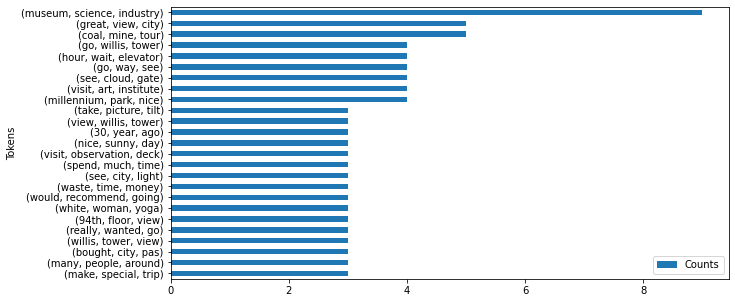

In [57]:
# Graph of Poor Bigram

fdist_tri_poor_graph = pd.DataFrame(fdist_tri_poor.most_common(25), columns=['Tokens', 'Counts']).set_index('Tokens').plot(kind='barh')
fdist_tri_poor_graph.invert_yaxis()

In [58]:
trigram_words_5star = [tup[0] for tup in fdist_tri_5star.most_common(50)]
trigram_words_5star

[('museum', 'science', 'industry'),
 ('“', 'bean', '”'),
 ('360', 'observation', 'deck'),
 ('cloud', 'gate', 'bean'),
 ('well', 'worth', 'visit'),
 ('visit', 'art', 'institute'),
 ('great', 'place', 'visit'),
 ('one', 'best', 'museum'),
 ('spend', 'whole', 'day'),
 ('great', 'view', 'city'),
 ('great', 'photo', 'opportunity'),
 ('could', 'spend', 'day'),
 ('could', 'easily', 'spend'),
 ('ice', 'skating', 'rink'),
 ('definitely', 'worth', 'visit'),
 ('coal', 'mine', 'tour'),
 ('maggie', 'daley', 'park'),
 ('view', 'lake', 'michigan'),
 ('would', 'highly', 'recommend'),
 ('la', 'grande', 'jatte'),
 ('tree', 'around', 'world'),
 ('art', 'museum', 'world'),
 ('bean', 'cloud', 'gate'),
 ('many', 'thing', 'see'),
 ('christmas', 'tree', 'around'),
 ('still', 'see', 'everything'),
 ('thorne', 'miniature', 'room'),
 ('wait', 'go', 'back'),
 ('see', 'cloud', 'gate'),
 ('millennium', 'park', 'great'),
 ('visit', 'millennium', 'park'),
 ('art', 'institute', 'one'),
 ('great', 'place', 'spend'),
 (

In [59]:
trigram_words_4star = [tup[0] for tup in fdist_tri_4star.most_common(50)]
trigram_words_4star

[('“', 'bean', '”'),
 ('360', 'observation', 'deck'),
 ('great', 'view', 'city'),
 ('well', 'worth', 'visit'),
 ('cloud', 'gate', 'bean'),
 ('bean', 'cloud', 'gate'),
 ('cloud', 'gate', 'aka'),
 ('definitely', 'worth', 'visit'),
 ('gate', 'aka', 'bean'),
 ('museum', 'science', 'industry'),
 ('would', 'definitely', 'recommend'),
 ('visit', 'observation', 'deck'),
 ('visit', 'cloud', 'gate'),
 ('great', 'photo', 'opportunity'),
 ('see', 'cloud', 'gate'),
 ('great', 'way', 'spend'),
 ('buy', 'ticket', 'online'),
 ('staff', 'friendly', 'helpful'),
 ('360', 'degree', 'view'),
 ('millennium', 'park', 'bean'),
 ('sir', 'anish', 'kapoor'),
 ('park', 'cloud', 'gate'),
 ('visit', 'art', 'institute'),
 ('see', 'millennium', 'park'),
 ('cloud', 'gate', 'sculpture'),
 ('place', 'walk', 'around'),
 ('“', 'tilt', '”'),
 ('nice', 'view', 'city'),
 ('around', 'millennium', 'park'),
 ('fun', 'take', 'picture'),
 ('park', 'must', 'see'),
 ('great', 'place', 'take'),
 ('lot', 'thing', 'see'),
 ('visit', '

In [60]:
trigram_words_poor = [tup[0] for tup in fdist_tri_poor.most_common(50)]
trigram_words_poor

[('museum', 'science', 'industry'),
 ('great', 'view', 'city'),
 ('coal', 'mine', 'tour'),
 ('go', 'willis', 'tower'),
 ('hour', 'wait', 'elevator'),
 ('go', 'way', 'see'),
 ('see', 'cloud', 'gate'),
 ('visit', 'art', 'institute'),
 ('millennium', 'park', 'nice'),
 ('take', 'picture', 'tilt'),
 ('view', 'willis', 'tower'),
 ('30', 'year', 'ago'),
 ('nice', 'sunny', 'day'),
 ('visit', 'observation', 'deck'),
 ('spend', 'much', 'time'),
 ('see', 'city', 'light'),
 ('waste', 'time', 'money'),
 ('would', 'recommend', 'going'),
 ('white', 'woman', 'yoga'),
 ('94th', 'floor', 'view'),
 ('really', 'wanted', 'go'),
 ('willis', 'tower', 'view'),
 ('bought', 'city', 'pas'),
 ('many', 'people', 'around'),
 ('make', 'special', 'trip'),
 ('ice', 'skating', 'rink'),
 ('definitely', 'worth', 'visit'),
 ('kid', 'running', 'around'),
 ('20', 'year', 'ago'),
 ('“', 'tilt', '”'),
 ('expensive', 'elevator', 'ride'),
 ('view', 'great', 'top'),
 ('30', 'second', 'experience'),
 ('thing', 'extra', '8'),
 ('b

In [61]:
trigram_common_words = list(set(trigram_words_5star).intersection(trigram_words_poor))
trigram_common_words = list(set(trigram_common_words).intersection(trigram_words_4star))
trigram_common_words

[('great', 'view', 'city'),
 ('see', 'cloud', 'gate'),
 ('museum', 'science', 'industry'),
 ('visit', 'art', 'institute'),
 ('360', 'observation', 'deck'),
 ('definitely', 'worth', 'visit')]

In [62]:
words_5star_tri_count = [tup for tup in fdist_tri_5star.most_common(50) if tup[0] in trigram_common_words]
print(len(words_5star_tri_count))

words_5star_tri_count_df = pd.DataFrame(words_5star_tri_count, columns = ['Words', '5Star_Count'])
words_5star_tri_count_df

6


,Words,5Star_Count
0,"(museum, science, industry)",112
1,"(360, observation, deck)",67
2,"(visit, art, institute)",47
3,"(great, view, city)",37
4,"(definitely, worth, visit)",32
5,"(see, cloud, gate)",25


In [63]:
words_4star_tri_count = [tup for tup in fdist_tri_4star.most_common(50) if tup[0] in trigram_common_words]
print(len(words_4star_tri_count))


words_4star_tri_count_df = pd.DataFrame(words_4star_tri_count, columns = ['Words', '4Star_Count'])
words_4star_tri_count_df

6


,Words,4Star_Count
0,"(360, observation, deck)",21
1,"(great, view, city)",18
2,"(definitely, worth, visit)",10
3,"(museum, science, industry)",10
4,"(see, cloud, gate)",8
5,"(visit, art, institute)",7


In [64]:
words_poor_tri_count = [tup for tup in fdist_tri_poor.most_common(50) if tup[0] in trigram_common_words]
print(len(words_poor_tri_count))

words_poor_tri_count_df = pd.DataFrame(words_poor_tri_count, columns = ['Words', 'Poor_Count'])
words_poor_tri_count_df

6


,Words,Poor_Count
0,"(museum, science, industry)",9
1,"(great, view, city)",5
2,"(see, cloud, gate)",4
3,"(visit, art, institute)",4
4,"(definitely, worth, visit)",3
5,"(360, observation, deck)",2


In [65]:
from functools import reduce

tri_dfs = [words_5star_tri_count_df, words_4star_tri_count_df, words_poor_tri_count_df]

combined_words_tri_df = reduce(lambda left,right: pd.merge(left,right,on='Words'), tri_dfs)
combined_words_tri_df

,Words,5Star_Count,4Star_Count,Poor_Count
0,"(museum, science, industry)",112,10,9
1,"(360, observation, deck)",67,21,2
2,"(visit, art, institute)",47,7,4
3,"(great, view, city)",37,18,5
4,"(definitely, worth, visit)",32,10,3
5,"(see, cloud, gate)",25,8,4


In [66]:
combined_words_tri_df[['5Star_Count']] = combined_words_tri_df[['5Star_Count']]/count_5star_ttl
combined_words_tri_df[['4Star_Count']] = combined_words_tri_df[['4Star_Count']]/count_5star_ttl
combined_words_tri_df[['Poor_Count']] = combined_words_tri_df[['Poor_Count']]/count_5star_ttl
combined_words_tri_df

,Words,5Star_Count,4Star_Count,Poor_Count
0,"(museum, science, industry)",0.014782,0.001320,0.001188
1,"(360, observation, deck)",0.008843,0.002772,0.000264
2,"(visit, art, institute)",0.006203,0.000924,0.000528
3,"(great, view, city)",0.004883,0.002376,0.000660
4,"(definitely, worth, visit)",0.004223,0.001320,0.000396
5,"(see, cloud, gate)",0.003299,0.001056,0.000528


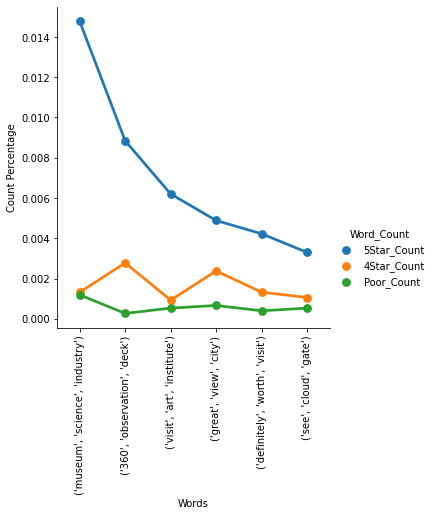

<Figure size 720x360 with 0 Axes>

In [79]:
combined_words_tri_df_plot = combined_words_tri_df.melt('Words', var_name='Word_Count', value_name = 'Count Percentage')
combined_words_tri_df_plot = sns.catplot(x="Words", y="Count Percentage", hue='Word_Count', 
                                         data=combined_words_tri_df_plot, kind='point')
plt.figure(figsize=(10,5))
combined_words_tri_df_plot.set_xticklabels(rotation='vertical', fontsize=10)
plt.show()

In [68]:
trigram_words_5star_only = list(set(trigram_words_5star) - set(trigram_words_4star) - set(trigram_words_poor))
trigram_words_5star_only

[('many', 'thing', 'see'),
 ('world', 'class', 'museum'),
 ('spend', 'whole', 'day'),
 ('year', 'old', 'son'),
 ('tree', 'around', 'world'),
 ('could', 'spend', 'day'),
 ('view', 'city', 'lake'),
 ('great', 'place', 'spend'),
 ('still', 'see', 'everything'),
 ('art', 'institute', 'one'),
 ('andy', 'warhol', 'exhibit'),
 ('la', 'grande', 'jatte'),
 ('learn', 'something', 'new'),
 ('christmas', 'tree', 'around'),
 ('spend', 'entire', 'day'),
 ('wait', 'go', 'back'),
 ('make', 'sure', 'go'),
 ('one', 'best', 'museum'),
 ('visited', 'art', 'institute'),
 ('millennium', 'park', 'great'),
 ('art', 'museum', 'world'),
 ('thorne', 'miniature', 'room'),
 ('every', 'time', 'go'),
 ('must', 'see', 'visiting'),
 ('maggie', 'daley', 'park'),
 ('could', 'easily', 'spend'),
 ('well', 'worth', 'time'),
 ('best', 'art', 'museum')]

In [69]:
trigram_words_4star_only = list(set(trigram_words_4star) - set(trigram_words_5star) - set(trigram_words_poor))
trigram_words_4star_only

[('observation', 'deck', 'tilt'),
 ('cloud', 'gate', 'sculpture'),
 ('staff', 'friendly', 'helpful'),
 ('must', 'see', 'visit'),
 ('nice', 'view', 'city'),
 ('visited', '360', 'observation'),
 ('around', 'millennium', 'park'),
 ('lot', 'thing', 'see'),
 ('john', 'hancock', 'tower'),
 ('visit', 'cloud', 'gate'),
 ('park', 'must', 'see'),
 ('would', 'definitely', 'recommend'),
 ('sir', 'anish', 'kapoor'),
 ('fun', 'take', 'picture'),
 ('view', 'day', 'night'),
 ('great', 'place', 'walk'),
 ('definitely', 'must', 'see'),
 ('coal', 'mine', 'exhibit'),
 ('see', 'millennium', 'park'),
 ('great', 'way', 'spend'),
 ('great', 'place', 'people'),
 ('day', 'could', 'see'),
 ('go', 'observation', 'deck'),
 ('millennium', 'park', 'bean'),
 ('place', 'walk', 'around'),
 ('great', 'place', 'take'),
 ('place', 'take', 'picture')]

In [70]:
trigram_words_poor_only = list(set(trigram_words_poor) - set(trigram_words_5star) - set(trigram_words_4star))
trigram_words_poor_only

[('30', 'year', 'ago'),
 ('“', 'thrill', '”'),
 ('kid', 'running', 'around'),
 ('hour', 'wait', 'elevator'),
 ('many', 'people', 'around'),
 ('view', 'great', 'top'),
 ('long', 'line', 'wait'),
 ('see', 'city', 'light'),
 ('willis', 'tower', 'view'),
 ('bought', 'city', 'pas'),
 ('running', 'around', 'everywhere'),
 ('view', 'nice', 'course'),
 ('make', 'special', 'trip'),
 ('white', 'woman', 'yoga'),
 ('would', 'recommend', 'going'),
 ('really', 'wanted', 'go'),
 ('made', 'seem', 'like'),
 ('could', 'see', 'anything'),
 ('top', 'john', 'hancock'),
 ('money', 'tilt', 'experience'),
 ('tilt', 'waste', 'money'),
 ('nice', 'sunny', 'day'),
 ('go', 'earlier', 'day'),
 ('view', 'willis', 'tower'),
 ('waste', 'time', 'money'),
 ('extra', 'money', 'tilt'),
 ('go', 'willis', 'tower'),
 ('millennium', 'park', 'nice'),
 ('20', 'year', 'ago'),
 ('30', 'second', 'experience'),
 ('view', 'john', 'hancock'),
 ('thing', 'extra', '8'),
 ('7', 'year', 'old'),
 ('94th', 'floor', 'view'),
 ('expensive', 

# Analysis of Helpful Reviews

In [80]:
ta_5vspoor_helpful_df = ta_5vspoor[ta_5vspoor['Review_Helpful']>0]
ta_5vspoor_helpful_df.sample(10)

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5
3712,The Art Institute of Chicago,Chicago,2019-07-01,2019-07-01,178,20,1,5,I'm been to most of the famous museums in the ...,Very impressed!,ny1001,LOS ANGLELES,,,,
1481,Millennium Park,Chicago,2019-08-01,2018-11-01,71,208,1,5,nice parc..look like phatamorghana and phenome...,oh what a park..oh what a day!,maya,BELGRADE,SERBIA,,,
1189,Millennium Park,Chicago,2019-08-01,2019-08-01,46,41,1,5,We love this place. We come every time we are ...,Love this place,Scottie1975,BRIGHTON,UNITED KINGDOM,,,
3836,The Art Institute of Chicago,Chicago,2018-12-01,2018-12-01,155,9,1,5,On a chilly Friday this was a wonderful museum...,Wonderful museum,streece,PADUCAH,KY,,,
1333,Millennium Park,Chicago,2019-09-01,2019-09-01,331,97,2,5,You cant come to Chicago and not take a look a...,Must See Attraction,Colin S,NORTHAMPTON,UNITED KINGDOM,,,
3815,The Art Institute of Chicago,Chicago,2018-09-01,2018-09-01,42,23,1,5,This lived up to its great reputation. Impress...,Wonderful collection,restleschestnut,LONDON,UNITED KINGDOM,,,
2004,The Art Institute of Chicago,Chicago,2018-12-01,2018-12-01,18,12,1,Poor,"There is a sign on this museum front door, men...","""Best museum' they say...",andreytg,LOS ANGELES,CA,,,
312,Millennium Park,Chicago,2019-05-01,2019-05-01,56,9,1,5,I visited the Bean on my two day trip to Chica...,Bean or cloud?,Kathrin-Karl,GREATER LONDON,UNITED KINGDOM,,,
32286,360 Chicago Observation Deck,Chicago,2018-04-01,2018-04-01,35,28,1,4,Excellent views of Chicago. Lines were a littl...,Superb views,Sra_Gil,,,,,
1577,Millennium Park,Chicago,2020-09-01,2020-09-01,149,66,1,4,The City has done an excellent job to ensure t...,Safe to Visit,ChrisandHolli,TAIPEI,TAIWAN,,,


In [81]:
helpful_total = len(ta_5vspoor_helpful_df)
helpful_total

1334

In [82]:
helpful_5star = len(ta_5vspoor_helpful_df[ta_5vspoor_helpful_df['Rating']==5])
helpful_5star

1032

In [83]:
helpful_4star = len(ta_5vspoor_helpful_df[ta_5vspoor_helpful_df['Rating']==4])
helpful_4star

197

In [84]:
helpful_poor = len(ta_5vspoor_helpful_df[ta_5vspoor_helpful_df['Rating']=='Poor'])
helpful_poor

105

In [85]:
count_5star_ttl

7577

In [86]:
count_4star_ttl

1803

In [87]:
count_poor_ttl

604

In [88]:
# Helpful reviews that gave 5 stars

helpful_5star/count_5star_ttl

0.13620166292727992

In [89]:
# Helpful reviews that gave 4 stars

helpful_4star/count_4star_ttl

0.10926234054353855

In [90]:
# Helpful reviews that gave 3 or fewer stars

helpful_poor/count_poor_ttl

0.173841059602649

- It seems that reviews that rated attractions with 3 stars or fewer were more likely to be viewed as helpful

In [91]:
ta_5vspoor_helpful_df[ta_5vspoor_helpful_df['Rating']=='Poor'].sample(10)

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5
29151,360 Chicago Observation Deck,Chicago,2019-03-01,2019-03-01,14,17,1,Poor,This was a disappointing experience. Definitel...,360 Chicago Observation Deck,Cheryl P,SAVANNAH,GA,,,
801,Millennium Park,Chicago,2020-03-01,2019-08-01,12,13,1,Poor,"Always something fun happening here, in additi...",Fun urban park,Brian S,,,,,
29385,Museum of Science and Industry,Chicago,2018-09-01,2018-09-01,3,3,1,Poor,After seeing all their ads throughout the city...,"Completely overrated, outdated and feels like ...",simpledisaster,SZCZECIN,POLAND,,,
1469,Millennium Park,Chicago,2020-10-01,2020-10-01,120,29,1,Poor,It was cool to see The Bean but there is nothi...,Not what I expected,simarx10,SANTA CLARA,CA,,,
31924,Museum of Science and Industry,Chicago,2020-02-01,2020-02-01,3,2,2,Poor,Visited the museum as all i wanted to see was ...,U-505 German Sub,skylanesart,CIRENECSTER,,,,
2160,The Art Institute of Chicago,Chicago,2018-09-01,2018-09-01,"2,273",206,1,Poor,The Lions welcome you to the institute...no do...,Actually a museum,Sparkie09,GOA,INDIA,,,
2701,The Art Institute of Chicago,Chicago,2019-10-01,2019-10-01,17,9,2,Poor,"Great Museum, excellent exhibits, helpful staf...",Fast Pass admission useless,globetrotter61_12,SAN FRANCISCO,CA,,,
30465,Museum of Science and Industry,Chicago,2019-07-01,2019-07-01,643,966,2,Poor,I know I must be getting old because I am goin...,Great museum but way too expensive. What is t...,Jason P,LANSING,MI,,,
32266,360 Chicago Observation Deck,Chicago,2019-07-01,2019-07-01,94,23,1,Poor,"Having been to Sears tower in the past, this s...",Price gouging a bit.,skydive4fun,TULSA,OK,,,
1119,Millennium Park,Chicago,2018-12-01,2018-12-01,229,18,1,Poor,It’s a nice place to walk around and rest afte...,It’s a park,Anin A,,,,,


In [95]:
ta_5vspoor_helpful_df.loc[29151, 'Text']

'This was a disappointing experience. Definitely not worth the price. The view was great, but not worth $22. Part of the deck was closed off to a private party and they also had full use of Tilt. There was a wait to get onto the elevator and an even longer wait to get on elevator to get down to lower floor.'

In [96]:
ta_5vspoor_helpful_df.head()

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5
28459,360 Chicago Observation Deck,Chicago,2018-04-01,2018-03-01,38,24,1,5,The kids wanted to try the “tilt” observatory ...,On our list of things to do while in the city,222gabrielej,HINSDALE,IL,,,
28469,360 Chicago Observation Deck,Chicago,2018-08-01,2018-07-01,156,79,1,5,"The elevator was speedy, the views were breath...","A great experience, better views than the Sear...",3rdCoastHighlander,MICHIGAN,,,,
28470,360 Chicago Observation Deck,Chicago,2019-07-01,2019-07-01,5,9,1,5,Loved the view from the Observation Deck and I...,What a view,412dell,DUBLIN,IRELAND,,,
28474,360 Chicago Observation Deck,Chicago,2018-10-01,2018-10-01,35,5,1,Poor,They decided to close at 6 on a Saturday night...,Disappointing Customer service,704angely,SAINT LOUIS,MO,,,
28481,360 Chicago Observation Deck,Chicago,2018-11-01,2018-10-01,895,767,1,5,"This is a good attraction in daylight, there a...",Daylight Visit,8SAB8,AMMAN,JORDAN,,,


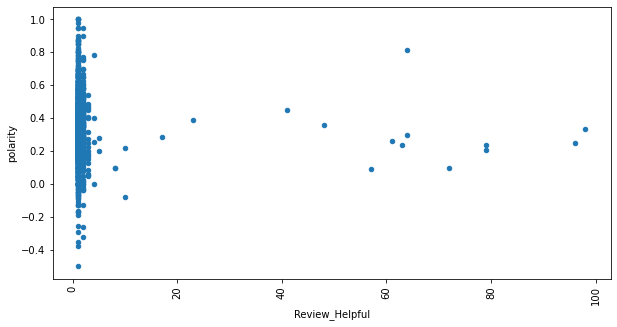

In [97]:
from textblob import TextBlob

sample_size = len(ta_5vspoor_helpful_df)

def sentiment_func(x):
    sentiment = TextBlob(x['Text'])
    x['polarity'] = sentiment.polarity
    x['subjectivity'] = sentiment.subjectivity
    return x

sample = ta_5vspoor_helpful_df.sample(sample_size).apply(sentiment_func, axis=1)
sample.plot.scatter('Review_Helpful', 'polarity').tick_params(axis='x', labelrotation = 90)

- Helpful reviews tend to be more positive

### Analysis of Review Text Polarity of the 20 most helpful users

In [98]:
helpful_users = ta_5vspoor.sort_values(by=['User_Helpful'], ascending = False).head(20)
helpful_users['Username'] = helpful_users['Username'].astype(str)
helpful_users

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5
29599,Museum of Science and Industry,Chicago,2019-01-01,2019-01-01,"9,552",973,0,5,It’s crowded. And the parking wasn’t great. Bu...,Kids loved it.,LostALot22,CHICAGO,IL,,,
30465,Museum of Science and Industry,Chicago,2019-07-01,2019-07-01,643,966,2,Poor,I know I must be getting old because I am goin...,Great museum but way too expensive. What is t...,Jason P,LANSING,MI,,,
2017,The Art Institute of Chicago,Chicago,2019-07-01,2018-11-01,799,951,1,5,"A Chicago Institution, that draws artists and ...",A Chicago Institution,Dana Los Angeles,LOS ANGELES,CA,,,
1488,Millennium Park,Chicago,2019-07-01,2018-11-01,799,951,2,5,This is a great space that changes with the se...,One of my favorite spots in Chicago - changes ...,Dana Los Angeles,LOS ANGELES,CA,,,
32895,Cloud Gate,Chicago,2018-10-01,2018-09-01,"4,531",946,3,5,To take the best pictures of yourself reflecte...,The best place to be at,FoodieChefDina,MEXICO CITY,MEXICO,,,
29928,360 Chicago Observation Deck,Chicago,2018-10-01,2018-09-01,"4,531",946,3,5,This building not only will give you gorgeous ...,A definite stop,FoodieChefDina,MEXICO CITY,MEXICO,,,
3508,The Art Institute of Chicago,Chicago,2018-10-01,2018-09-01,"4,531",946,3,5,To see so many incredible pieces of art so clo...,soooo worth it,FoodieChefDina,MEXICO CITY,MEXICO,,,
2052,The Art Institute of Chicago,Chicago,2019-01-01,2018-09-01,772,855,1,5,We thoroughly enjoyed our afternoon here. We w...,A great way to spend an afternoon!,Sapphire Ed,ST. THOMAS,,,,
413,Millennium Park,Chicago,2019-01-01,2018-09-01,772,855,1,5,While in Chicago for a nephew’s wedding four o...,Beautiful park to sit or stroll.,Sapphire Ed,ST. THOMAS,,,,
31968,Museum of Science and Industry,Chicago,2020-03-01,2019-06-01,"2,634",854,0,5,"Family was visiting, so we headed to the Museu...","Large museum, some very cool exhibits",brmusicman,CHICAGO,IL,,,


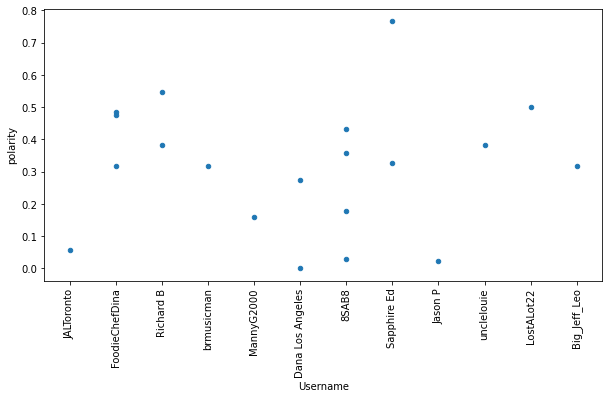

In [99]:
from textblob import TextBlob

def sentiment_func(x):
    sentiment = TextBlob(x['Text'])
    x['polarity'] = sentiment.polarity
    x['subjectivity'] = sentiment.subjectivity
    return x

sample = helpful_users.sample(20).apply(sentiment_func, axis=1)
sample.plot.scatter('Username', 'polarity').tick_params(axis='x', labelrotation = 90)

In [100]:
helpful_users_condensed = helpful_users[helpful_users.columns[[10, 5, 0, 8]]]
helpful_users_condensed

,Username,User_Helpful,Attraction,Text
29599,LostALot22,973,Museum of Science and Industry,It’s crowded. And the parking wasn’t great. Bu...
30465,Jason P,966,Museum of Science and Industry,I know I must be getting old because I am goin...
2017,Dana Los Angeles,951,The Art Institute of Chicago,"A Chicago Institution, that draws artists and ..."
1488,Dana Los Angeles,951,Millennium Park,This is a great space that changes with the se...
32895,FoodieChefDina,946,Cloud Gate,To take the best pictures of yourself reflecte...
29928,FoodieChefDina,946,360 Chicago Observation Deck,This building not only will give you gorgeous ...
3508,FoodieChefDina,946,The Art Institute of Chicago,To see so many incredible pieces of art so clo...
2052,Sapphire Ed,855,The Art Institute of Chicago,We thoroughly enjoyed our afternoon here. We w...
413,Sapphire Ed,855,Millennium Park,While in Chicago for a nephew’s wedding four o...
31968,brmusicman,854,Museum of Science and Industry,"Family was visiting, so we headed to the Museu..."


### Dirk W's Reviews and polarity assessment

In [102]:
print(helpful_users_condensed.loc[32895, 'Attraction'])
helpful_users_condensed.loc[32895, 'Text']

Cloud Gate


'To take the best pictures of yourself reflected on the cloud gate, amazing views towards the buildings, artistic pictures, and eat the hotdogs and pretzels next to the cloud gate'

In [103]:
print(helpful_users_condensed.loc[29928, 'Attraction'])
helpful_users_condensed.loc[29928, 'Text']

360 Chicago Observation Deck


'This building not only will give you gorgeous views around Chicago, but it has such rich history! And you have to try the slant of glass that makes you feel like you are floating on top of the other buildings if you like excitement. The var upstairs is nice to enjoy the views too.'

In [104]:
print(helpful_users_condensed.loc[3508, 'Attraction'])
helpful_users_condensed.loc[3508, 'Text']

The Art Institute of Chicago


'To see so many incredible pieces of art so close and so many impressionist works is such an experience, I would do it all over again, Do not miss it.'

# Text Polarity/Basic Sentiment Analysis

In [131]:
from textblob import TextBlob

sample_size = len(ta_5vspoor)

def sentiment_func(x):
    sentiment = TextBlob(x['Text'])
    x['polarity'] = sentiment.polarity
    x['subjectivity'] = sentiment.subjectivity
    return x

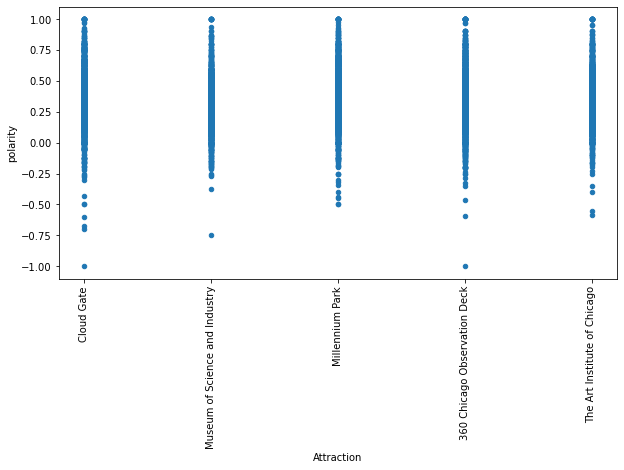

In [132]:
sample = ta_5vspoor.sample(sample_size).apply(sentiment_func, axis=1)
sample.plot.scatter('Attraction', 'polarity').tick_params(axis='x', labelrotation = 90)

# Analyzing Rating Based on Month and Year

In [133]:
ta_5vspoor.groupby('Attraction').agg(['count'])['Title']

ta_5vspoor_df = ta_5vspoor.loc[:, ['Visited', 'Rating']]
ta_5vspoor_df.sample(15)

,Visited,Rating
28771,2018-07-01,5
30917,2017-12-01,5
33697,2019-05-01,5
31289,2018-10-01,5
33710,2019-07-01,5
30948,2019-05-01,4
1627,2019-03-01,4
3191,2019-09-01,5
317,2019-04-01,4
32648,2018-08-01,5


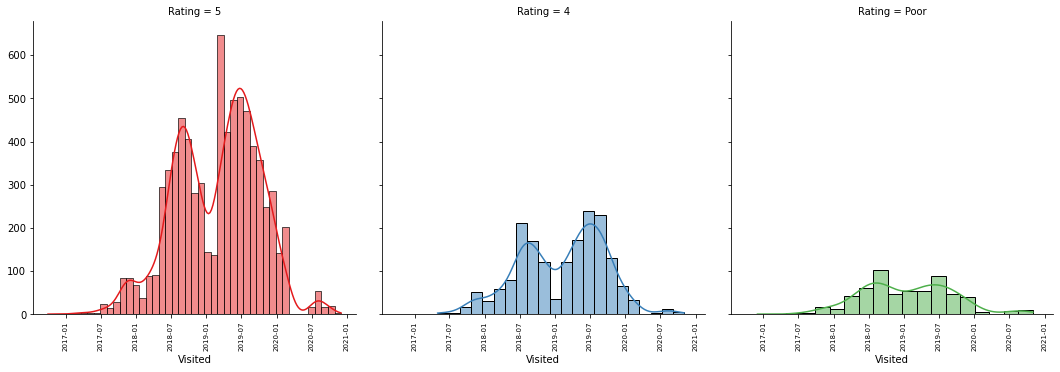

In [134]:
visited_grid = sns.FacetGrid(data=ta_5vspoor_df, col='Rating', hue="Rating", palette="Set1", height=5, 
                             aspect=1, col_order=ta_chng_rat.Rating.value_counts().index)

visited_grid.map(sns.histplot, "Visited", kde=True)

visited_grid.set_xticklabels(rotation='vertical', fontsize=7)

### Analyzing Ratings of Specific Attractions

In [135]:
ta_5vspoor_1 = ta_5vspoor[(ta_5vspoor['Attraction']=='The Art Institute of Chicago')]
ta_5vspoor_1

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5
2000,The Art Institute of Chicago,Chicago,2019-11-01,2019-11-01,61,23,0,5,What a fabulous place to visit. We were fortun...,19-Nov,Mary B,CABO SAN LUCAS,MEXICO,,,
2001,The Art Institute of Chicago,Chicago,2019-06-01,2019-06-01,412,75,0,5,A lovely museum with lots to see. I truly love...,Beautiful,Amanda V,TORONTO,CANADA,,,
2002,The Art Institute of Chicago,Chicago,2018-10-01,2018-10-01,254,43,0,5,"Get place , the collections are very well pres...",Lazy Afternoon,rafcama57,SAN JUAN,PR,,,
2003,The Art Institute of Chicago,Chicago,2019-05-01,2019-05-01,140,4,0,5,It was most beautiful place we were inside for...,The Art institute of Chicago,DrSaritaPunia,,,,,
2004,The Art Institute of Chicago,Chicago,2018-12-01,2018-12-01,18,12,1,Poor,"There is a sign on this museum front door, men...","""Best museum' they say...",andreytg,LOS ANGELES,CA,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34800,The Art Institute of Chicago,Chicago,2018-10-01,2018-09-01,18,4,0,5,Outstanding collections of art from various pe...,Great collections,Carrie C,MADISON,MS,,,
34801,The Art Institute of Chicago,Chicago,2019-09-01,2019-09-01,341,83,0,4,So much to see. We went for the Manet exhibiti...,Too big for one visit.,adobeKent,KENT,,,,
34802,The Art Institute of Chicago,Chicago,2018-11-01,2018-07-01,119,164,0,5,Love the Art Institute. Amazing exhibits. Park...,Great spot to cool down on a hot summer day,dkrejser,CHICAGO,IL,,,
34804,The Art Institute of Chicago,Chicago,2018-10-01,2017-11-01,5,0,0,5,"Interesting museum. Love the various arts, the...",Must go,Ana A,,,,,


In [136]:
ta_5vspoor_1_df = ta_5vspoor_1.loc[:, ['Visited', 'Rating']]
ta_5vspoor_1_df.sample(15)

,Visited,Rating
3868,2019-03-01,5
3368,2018-11-01,5
2537,2020-01-01,5
2177,2019-08-01,5
2921,2019-05-01,5
2951,2019-06-01,5
2207,2018-09-01,5
2307,2019-12-01,5
2964,2019-09-01,5
2021,2019-06-01,5


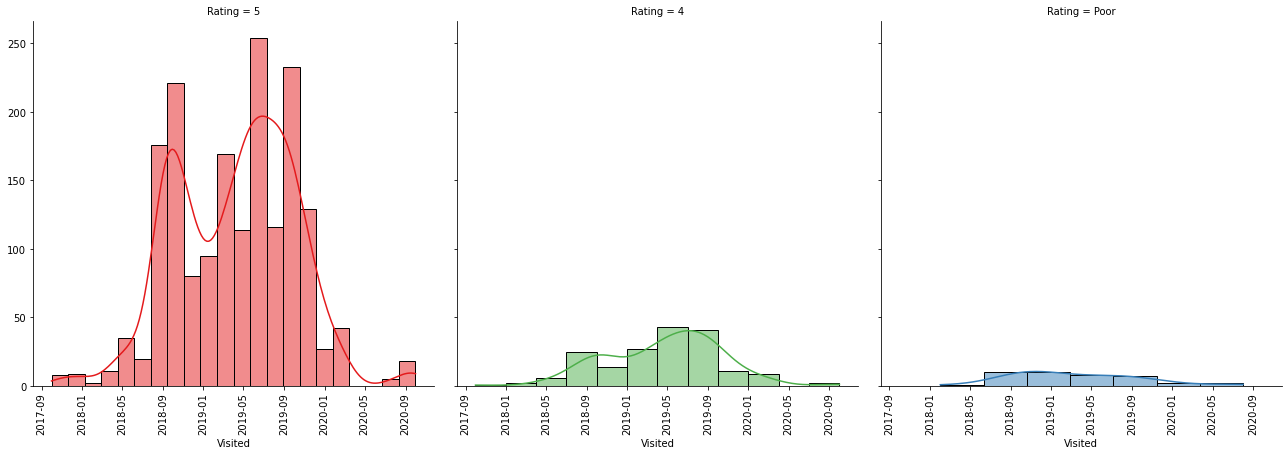

In [137]:
visited_grid_1 = sns.FacetGrid(data=ta_5vspoor_1_df, col='Rating', hue="Rating", palette="Set1", height=6, aspect=1,
                             col_order=ta_chng_rat.Rating.value_counts().index)

visited_grid_1.map(sns.histplot, "Visited", kde=True)

visited_grid_1.set_xticklabels(rotation='vertical', fontsize=10)

- There were fewer poor ratings in the summer/fall of 2019
- This seems to indicate the later reviews may be better overall during the seasonal spike

In [138]:
ta_5vspoor_2 = ta_5vspoor[(ta_5vspoor['Attraction']=='Museum of Science and Industry')]
ta_5vspoor_2

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5
28395,Museum of Science and Industry,Chicago,2018-05-01,2018-05-01,77,66,0,Poor,We visited the museum and were very eager to s...,Avoid during school hours!,swissblitz,LUANG PRABANG,LAOS,,,
28398,Museum of Science and Industry,Chicago,2018-05-01,2017-11-01,17,4,0,5,"On a family day or a family vacation, go here!...",Do not miss!,DSRHAOK,CHICAGO,IL,,,
28400,Museum of Science and Industry,Chicago,2018-05-01,2018-05-01,21,6,0,Poor,I must have looked at a wrong website. In most...,Watch the hours of operation,Beth J,HUNTSVILLE,AL,,,
28402,Museum of Science and Industry,Chicago,2018-05-01,2018-05-01,27,7,0,4,Came here for the Sub exhibit. The exhibit was...,Das Boot that went missing,stazi0ne,LOS ANGELES,CA,,,
28403,Museum of Science and Industry,Chicago,2018-05-01,2018-05-01,13,4,0,5,"Great place to spend an afternoon, very educat...",Great museum for kids of all ages,Kathryn L,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34384,Museum of Science and Industry,Chicago,2018-10-01,2018-02-01,113,29,0,5,The U-Boat exhibit is amazing. It is a guided ...,Amazing exhibit,Pawel S,PARK RIDGE,IL,,,
34386,Museum of Science and Industry,Chicago,2019-01-01,2019-01-01,48,1,0,5,We visited the Museum of Science and Industry ...,Great Time!,bulls0721,KALAMAZOO,MI,,,
34387,Museum of Science and Industry,Chicago,2018-10-01,2018-10-01,6,2,0,5,It was awesome. My kids had a great time. We l...,Great time,Ronny Y,,,,,
34389,Museum of Science and Industry,Chicago,2019-01-01,2018-12-01,31,3,0,5,"We went over the holidays, primarily to see th...",Awesome place for kids and adults alike,Mike O,LIBERTYVILLE,IL,,,


In [139]:
ta_5vspoor_2_df = ta_5vspoor_2.loc[:, ['Visited', 'Rating']]
ta_5vspoor_2_df.sample(15)

,Visited,Rating
30686,2019-08-01,5
30610,2019-07-01,5
29698,2019-04-01,5
31832,2019-12-01,5
30803,2019-10-01,5
30481,2019-07-01,5
29425,2018-10-01,5
28913,2018-09-01,4
30507,2019-07-01,5
29497,2018-11-01,5


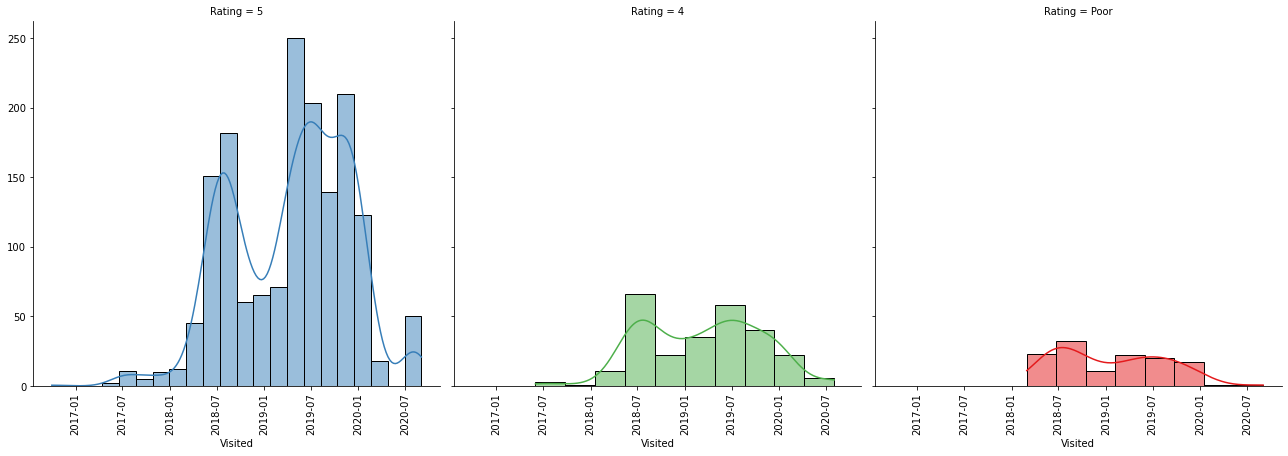

In [140]:
visited_grid_2 = sns.FacetGrid(data=ta_5vspoor_2_df, col='Rating', hue="Rating", palette="Set1", height=6, aspect=1,
                             col_order=ta_chng_rat.Rating.value_counts().index)

visited_grid_2.map(sns.histplot, "Visited", kde=True)

visited_grid_2.set_xticklabels(rotation='vertical', fontsize=10)

- Based on what we can see from the poor ratings histogram from Fenway Park, we may be able to conjecture that the significant increase in poor ratings in Boston was caused by this uptake

In [141]:
ta_5vspoor_3 = ta_5vspoor[(ta_5vspoor['Attraction']=='360 Chicago Observation Deck')]
ta_5vspoor_3

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5
28450,360 Chicago Observation Deck,Chicago,2017-11-01,2017-11-01,1,0,0,5,"As you would expect from a tall building, you ...",Great Views,_beattie1988,DUBLIN,IRELAND,,,
28453,360 Chicago Observation Deck,Chicago,2018-05-01,2018-05-01,3,1,0,5,Went to another observation deck over the holi...,Great visit,15williamas,PHOENIX,,,,
28455,360 Chicago Observation Deck,Chicago,2017-11-01,2017-10-01,26,8,0,5,"We were here with no lines. Very roomy, not-cr...",Fantastic if you choose the right time!,2017_TA_KS,EUROPE,,,,
28456,360 Chicago Observation Deck,Chicago,2018-08-01,2018-07-01,5,2,0,4,Many things and people made it hard to find an...,Great view but hard to find open area,207garyj,MADEIRA,OH,,,
28458,360 Chicago Observation Deck,Chicago,2018-07-01,2018-07-01,27,5,0,5,This was the first place we visited in Chicago...,Fabulous View,210Jenny,BRISBANE,AUSTRALIA,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32990,360 Chicago Observation Deck,Chicago,2018-07-01,2018-07-01,16,0,0,Poor,If you have the choice between 360 Chicago and...,Chicago,zanne825,NEW YORK CITY,,,,
32993,360 Chicago Observation Deck,Chicago,2019-01-01,2019-01-01,25,29,0,5,Very fun! We went here for the NYE party. At f...,Amazing Time!!,ZEBA N,,,,,
32997,360 Chicago Observation Deck,Chicago,2018-08-01,2018-07-01,23,3,0,5,One has to experience the tilt. It is amazing ...,Awsome,zeusinski,GRAND FALLS WINDSOR,CANADA,,,
33001,360 Chicago Observation Deck,Chicago,2019-09-01,2019-09-01,23,3,0,5,Wonderful views of Chicago and Lake Michigan. ...,"Great Views, Short Line",Zingbot,MADISON,WI,,,


In [142]:
ta_5vspoor_3_df = ta_5vspoor_3.loc[:, ['Visited', 'Rating']]
ta_5vspoor_3_df.sample(15)

,Visited,Rating
31292,2018-10-01,4
29137,2019-06-01,Poor
30166,NaT,4
29007,2018-02-01,4
31236,2019-09-01,5
31109,2018-10-01,5
29047,2019-03-01,5
32516,2019-08-01,4
32452,2019-03-01,4
30308,2018-06-01,5


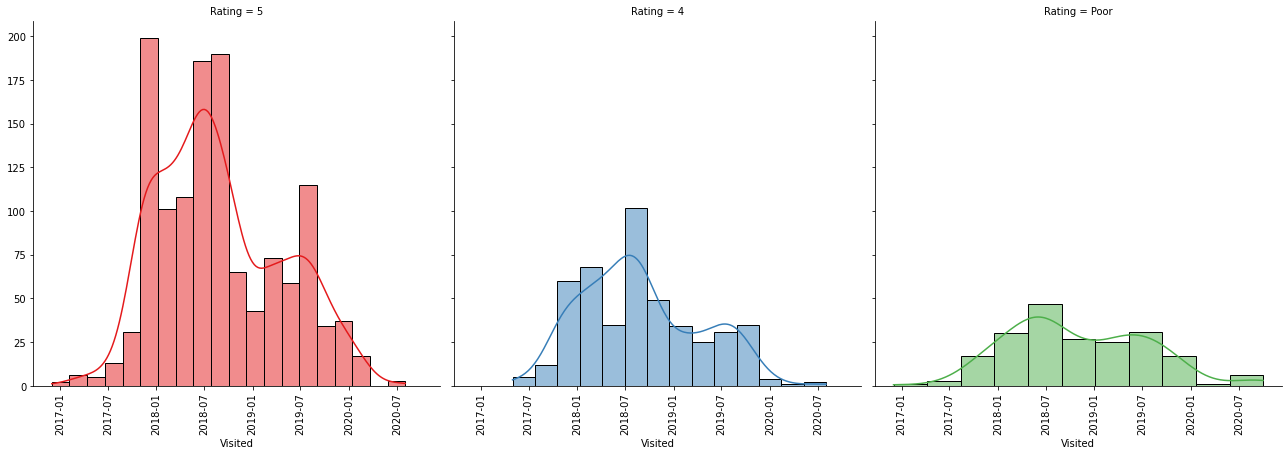

In [143]:
visited_grid_3 = sns.FacetGrid(data=ta_5vspoor_3_df, col='Rating', hue="Rating", palette="Set1", height=6, aspect=1,
                             col_order=ta_chng_rat.Rating.value_counts().index)

visited_grid_3.map(sns.histplot, "Visited", kde=True)

visited_grid_3.set_xticklabels(rotation='vertical', fontsize=10)

In [144]:
ta_5vspoor_4 = ta_5vspoor[(ta_5vspoor['Attraction']=='Cloud Gate')]
ta_5vspoor_4

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5
31319,Cloud Gate,Chicago,2018-07-01,2018-03-01,51,12,0,4,While walking around Millennium Park we had to...,Must see photo op,emilymarie21,EVANSVILLE,IN,,,
31322,Cloud Gate,Chicago,2018-07-01,2018-07-01,14,1,0,4,"I like to visit the Cloud Gate aka the ""Bean"" ...",A fun gathering place!,Sheila N,,,,,
31324,Cloud Gate,Chicago,2018-07-01,2018-07-01,50,16,0,5,"This sculpture is cool in pictures, but is eve...",Beautiful installation!,gabme,STANDISH,ME,,,
31326,Cloud Gate,Chicago,2018-07-01,2018-07-01,406,73,0,5,"Well, it's one of those places you have to vis...",Cool photo op,ElBirdos,MISSOURI,,,,
31327,Cloud Gate,Chicago,2018-07-01,2018-07-01,199,38,0,Poor,To many people around to actually enjoy it and...,Nice to see but didn't stay long,Courtney G,LEXINGTON,NC,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34368,Cloud Gate,Chicago,2019-08-01,2019-07-01,3,0,0,5,Great place to relax and people watch. Nice vi...,Relaxing in Downtown Chicago,WMR,CHICAGO,,,,
34369,Cloud Gate,Chicago,2019-07-01,2019-07-01,81,30,0,5,It's in Millennium Park and free to see. Not s...,Must See,desilady1,WILMINGTON,DE,,,
34370,Cloud Gate,Chicago,2019-08-01,2018-10-01,7,0,0,5,"Cloud Gate, known locally as “The Bean” is a m...",New Chicago Icon,Michael B,CHICAGO,IL,,,
34371,Cloud Gate,Chicago,2019-07-01,2019-07-01,6,1,0,5,The bean is always a fun place to visit - lots...,We love the bean!,travelling bird lover,,,,,


In [145]:
ta_5vspoor_4_df = ta_5vspoor_4.loc[:, ['Visited', 'Rating']]
ta_5vspoor_4_df.sample(15)

,Visited,Rating
33727,2019-07-01,5
33890,2019-08-01,Poor
34326,2020-03-01,5
33754,2019-07-01,4
33390,2019-03-01,5
34066,2019-10-01,Poor
33675,2019-04-01,4
32826,2018-09-01,5
31406,2018-08-01,5
33864,2019-08-01,5


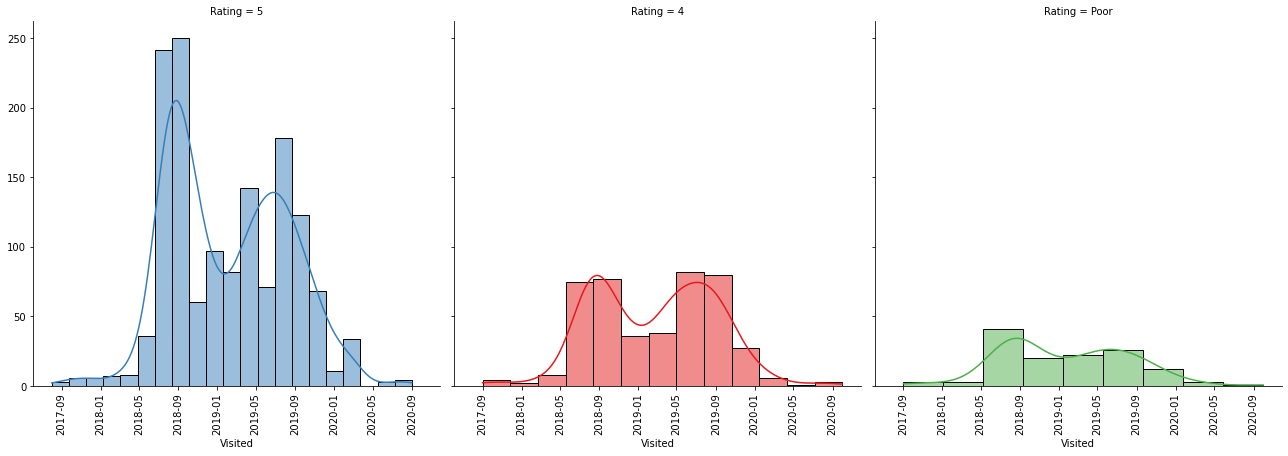

In [146]:
visited_grid_4 = sns.FacetGrid(data=ta_5vspoor_4_df, col='Rating', hue="Rating", palette="Set1", height=6, aspect=1,
                             col_order=ta_chng_rat.Rating.value_counts().index)

visited_grid_4.map(sns.histplot, "Visited", kde=True)

visited_grid_4.set_xticklabels(rotation='vertical', fontsize=10)

In [147]:
ta_5vspoor_5 = ta_5vspoor[(ta_5vspoor['Attraction']=='Millennium Park')]
ta_5vspoor_5

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5
25,Millennium Park,Chicago,2019-07-01,2019-07-01,122,28,0,5,We loved pretty much everything about this big...,Beautiful....even In July!,SoTxAdventurers,MCALLEN,TX,,,
26,Millennium Park,Chicago,2018-12-01,2018-12-01,105,4,0,5,The park is nice. The bean is cool. It was a l...,Cool beans,Abi,LYNCHBURG,VA,,,
27,Millennium Park,Chicago,2018-12-01,2018-12-01,231,58,0,4,We had to stop at the Millenium park They had ...,Must stop,AnikF,MONTREAL,CANADA,,,
28,Millennium Park,Chicago,2019-03-01,2019-03-01,22,5,0,4,"Even though we visited in the winter , the par...",Very cool spot,542jacklynp,FORT WORTH,TX,,,
29,Millennium Park,Chicago,2020-01-01,2019-08-01,83,15,1,5,... and smart! The place is inspiring while re...,!! Exciting site...,Iw A,BRUSSELS,BELGIUM,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34835,Millennium Park,Chicago,2019-04-01,2018-07-01,24,2,0,5,"It's easy to get to, fun to walk through, and ...",So much fun,jlewgadawg,ALPHARETTA,GA,,,
34836,Millennium Park,Chicago,2018-11-01,2018-09-01,127,4,1,5,Must go when visiting Chicago! A lot of differ...,Beautiful park,Carol@,OSASCO,SP,,,
34837,Millennium Park,Chicago,2019-04-01,2019-04-01,821,131,0,5,On a visit to Chicago we went to the Millenniu...,'The Bean' is probably the best piece of art I...,OldBill2,NEWCASTLE UPON TYNE,UNITED KINGDOM,,,
34838,Millennium Park,Chicago,2018-11-01,2018-11-01,"6,566",5,0,5,Chicago's Millennium Park is such a beautiful ...,No. 1 tourist attraction in the Midwest,Taylor B,CHICAGO,IL,,,


In [148]:
ta_5vspoor_5_df = ta_5vspoor_5.loc[:, ['Visited', 'Rating']]
ta_5vspoor_5_df.sample(15)

,Visited,Rating
952,2019-06-01,5
970,2020-01-01,5
1772,2019-08-01,5
563,2019-03-01,4
1830,2019-08-01,5
1499,2020-01-01,4
1580,2020-08-01,4
1102,2019-06-01,4
1582,2019-11-01,5
1289,2020-09-01,5


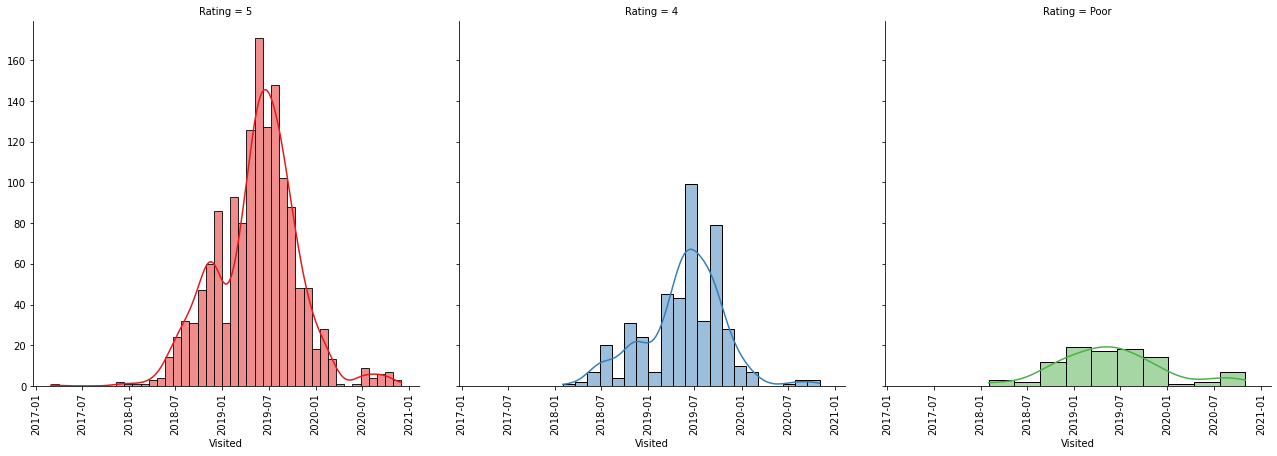

In [149]:
visited_grid_5 = sns.FacetGrid(data=ta_5vspoor_5_df, col='Rating', hue="Rating", palette="Set1", height=6, aspect=1,
                             col_order=ta_chng_rat.Rating.value_counts().index)

visited_grid_5.map(sns.histplot, "Visited", kde=True)

visited_grid_5.set_xticklabels(rotation='vertical', fontsize=10)

## Analyzing 5 star reviews on specific month and year

In [150]:
ta_5vspoor_date = ta_5vspoor[ta_5vspoor['Visited']=='2019-01-01']

corpus_5star_date = ' '.join(ta_5vspoor_date[ta_5vspoor_date['Rating']==5]['Text']).lower()
tokens_5star_date = [lemmatizer.lemmatize(tokens) for tokens in word_tokenize(corpus_5star_date) if tokens not in stop_filters]

bigram_5star_date = list(nltk.bigrams(tokens_5star_date))
fdist_bi_5star_date = FreqDist(bigram_5star_date)
fdist_bi_5star_date.most_common(10)

[(('art', 'institute'), 16),
 (('millennium', 'park'), 9),
 (('art', 'museum'), 8),
 (('ice', 'skating'), 7),
 (('great', 'place'), 7),
 (('much', 'see'), 7),
 (('must', 'see'), 6),
 (('“', 'bean'), 6),
 (('bean', '”'), 6),
 (('worth', 'visit'), 6)]

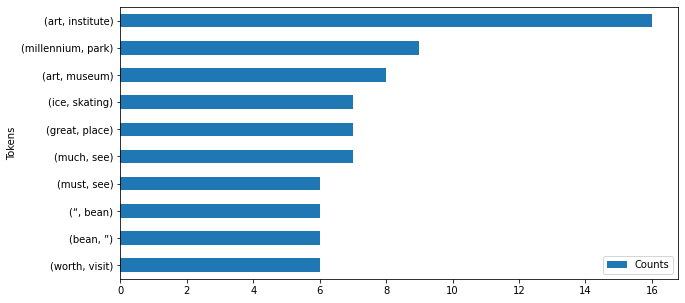

In [151]:
# Graph of 5 Star Bigram

fdist_bi_5star_date_graph = pd.DataFrame(fdist_bi_5star_date.most_common(10),
                                    columns=['Tokens', 'Counts']).set_index('Tokens').plot(kind='barh')
fdist_bi_5star_date_graph.invert_yaxis()

In [152]:
from textblob import TextBlob

sample_size = len(ta_5vspoor_date.Attraction)

def sentiment_func(x):
    sentiment = TextBlob(x['Text'])
    x['polarity'] = sentiment.polarity
    x['subjectivity'] = sentiment.subjectivity
    return x

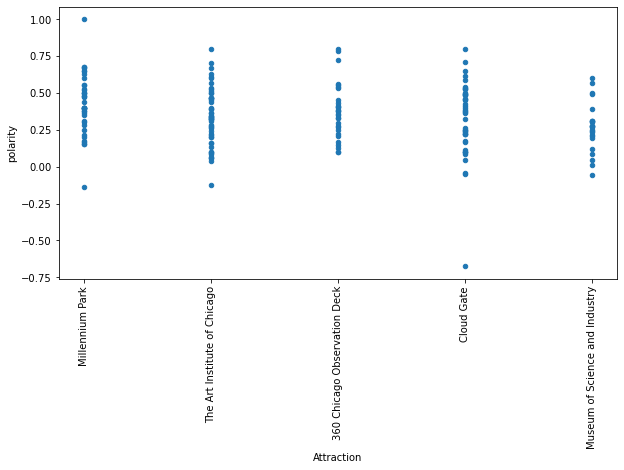

In [153]:
sample = ta_5vspoor_date.sample(sample_size).apply(sentiment_func, axis=1)
sample.plot.scatter('Attraction', 'polarity').tick_params(axis='x', labelrotation = 90)

- Analyzing all reviews on specific month and year

In [154]:
ta_date = ta_5vspoor[ta_5vspoor['Visited']=='2019-01-01']

In [155]:
corpus_date = ' '.join(ta_date['Text']).lower()
tokens_date = [lemmatizer.lemmatize(tokens) for tokens in word_tokenize(corpus_date) if tokens not in stop_filters]

bigram_date = list(nltk.bigrams(tokens_date))
fdist_bi_date = FreqDist(bigram_date)
fdist_bi_date.most_common(20)

[(('art', 'institute'), 18),
 (('ice', 'skating'), 12),
 (('millennium', 'park'), 11),
 (('worth', 'visit'), 9),
 (('art', 'museum'), 9),
 (('cloud', 'gate'), 8),
 (('great', 'place'), 8),
 (('much', 'see'), 8),
 (('must', 'see'), 7),
 (('take', 'picture'), 7),
 (('spend', 'time'), 7),
 (('“', 'bean'), 7),
 (('bean', '”'), 7),
 (('skating', 'rink'), 7),
 (('buy', 'ticket'), 6),
 (('great', 'view'), 6),
 (('walk', 'around'), 6),
 (('must', 'visit'), 5),
 (('place', 'take'), 4),
 (('tourist', 'attraction'), 4)]

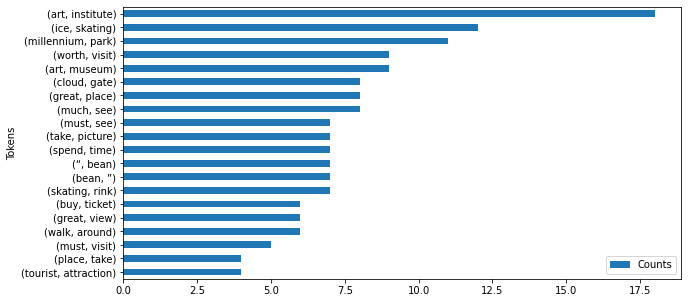

In [156]:
fdist_bi_date_graph = pd.DataFrame(fdist_bi_date.most_common(20),
                                    columns=['Tokens', 'Counts']).set_index('Tokens').plot(kind='barh')
fdist_bi_date_graph.invert_yaxis()

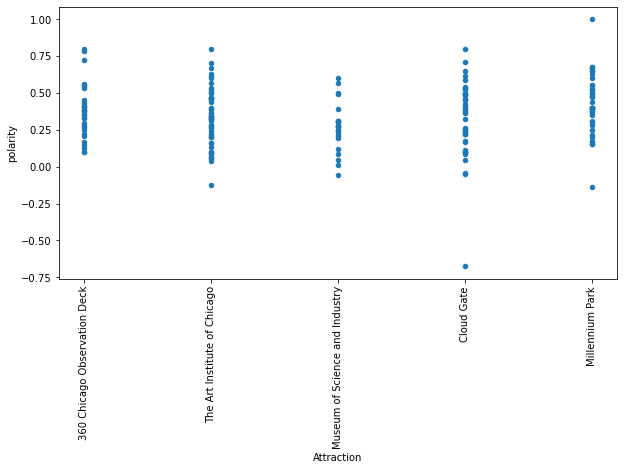

In [157]:
from textblob import TextBlob

sample_size = len(ta_date.Attraction)

def sentiment_func(x):
    sentiment = TextBlob(x['Text'])
    x['polarity'] = sentiment.polarity
    x['subjectivity'] = sentiment.subjectivity
    return x

sample = ta_date.sample(sample_size).apply(sentiment_func, axis=1)
sample.plot.scatter('Attraction', 'polarity').tick_params(axis='x', labelrotation = 90)

# User Location-Based Analysis

In [173]:
user_loc_df = tripadv[(tripadv['City']=='Chicago') &
                     (tripadv['User_Loc2']!='')]
user_loc_agg_df = user_loc_df.groupby('User_Loc2')['Rating'].agg(['count', 'mean', 'std'])
user_loc_agg_df

,count,mean,std
User_Loc2,,,
AK,10,4.600000,0.516398
AL,40,4.675000,0.797030
AL KUWAYT,1,5.000000,NaN
AL.,1,2.000000,NaN
AM,1,5.000000,NaN
...,...,...,...
WA,72,4.680556,0.646254
WI,146,4.664384,0.656820
WV,3,4.333333,0.577350


In [174]:
user_loc_agg_df_10 = user_loc_agg_df[user_loc_agg_df['count']>=10].sort_values('mean', ascending = False)
user_loc_agg_df_10.head(5)

,count,mean,std
User_Loc2,,,
RUSSIA,11,5.000000,0.000000
RJ,11,5.000000,0.000000
DE,10,5.000000,0.000000
COLOMBIA,10,5.000000,0.000000
SP,30,4.933333,0.253708


In [175]:
user_loc_agg_df_10.tail(5)

,count,mean,std
User_Loc2,,,
THE NETHERLANDS,41,4.487805,0.675350
LA,47,4.404255,0.798356
SINGAPORE,28,4.392857,0.785955
DENMARK,11,4.363636,0.924416
NH,17,4.352941,1.320094


In [176]:
ta_loc_1 = user_loc_df[(user_loc_df['User_Loc2']=='RUSSIA') |
                       (user_loc_df['User_Loc2']=='RJ') |
                       (user_loc_df['User_Loc2']=='DE') |
                       (user_loc_df['User_Loc2']=='COLOMBIA') |
                       (user_loc_df['User_Loc2']=='SP')]
ta_loc_1.sample(20)

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5
1057,Millennium Park,Chicago,2019-09-01,2019-09-01,16,5,1,5,"It was impressive only in pictures, but being ...",I needed to go here when in Chicago!!,VanessaFebres,BOGOTA,COLOMBIA,,,
28579,Museum of Science and Industry,Chicago,2018-06-01,2017-07-01,28,9,0,5,"Biology, Technology, History and Earth Science...",Great science shows.,Julio Cesar Garcia Alvarez,MANIZALES,COLOMBIA,,,
32370,360 Chicago Observation Deck,Chicago,2019-03-01,2019-03-01,21,10,0,5,"We had a great time at 360 Chicago, we bought ...",Great Experience,Thais T,SAO PAULO,SP,,,
33123,Cloud Gate,Chicago,2018-12-01,2018-11-01,32,33,1,4,"This is Very interesting siteseeng,you van see...",O Feijão,roquettedr,BARUERI,SP,,,
30928,360 Chicago Observation Deck,Chicago,2018-01-01,2018-01-01,1,0,0,5,A must visit in Chicago. I just wish there wer...,Must go,Leonidas P,SAO PAULO,SP,,,
3359,The Art Institute of Chicago,Chicago,2018-11-01,2018-10-01,9,4,2,5,The Art Institute of Chicago is an overwhelmin...,Outstanding collection,admal2017,JUQUEÍ,SP,,,
161,Millennium Park,Chicago,2020-01-01,2019-10-01,481,82,1,5,Awesome park in the Loop with exceptional exam...,A pearl of Chicago,Rolshchikov-Dmitry,MOSCOW,RUSSIA,,,
32088,360 Chicago Observation Deck,Chicago,2019-02-01,2019-01-01,2,0,0,5,"At 360 Chicago, you have an amazing view of th...",Amazing view on a wonderful day,Raphael Miranda,SAO PAULO,SP,,,
2631,The Art Institute of Chicago,Chicago,2018-12-01,2018-12-01,81,24,1,5,"I went with my husband on Dec 29th, we love mu...",Excellent museum with great collection,traveler_AIS,BOGOTA,COLOMBIA,,,
2236,The Art Institute of Chicago,Chicago,2018-10-01,2018-10-01,46,6,0,5,This is a must visit for those who enjoy arts ...,Amazing Collection!,Babywombat_br,SAO PAULO,SP,,,


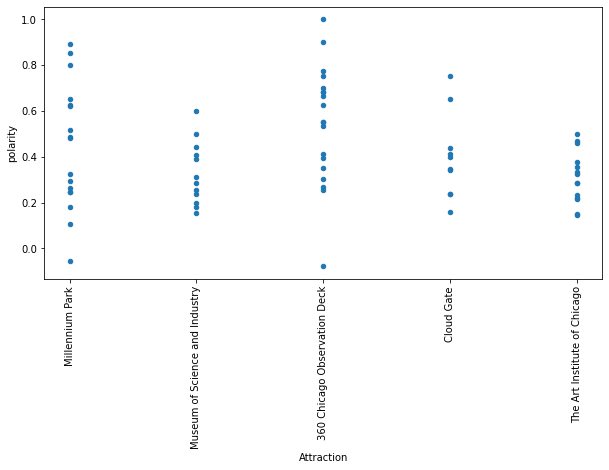

In [177]:
from textblob import TextBlob

sample_size = len(ta_loc_1.Attraction)

def sentiment_func(x):
    sentiment = TextBlob(x['Text'])
    x['polarity'] = sentiment.polarity
    x['subjectivity'] = sentiment.subjectivity
    return x

sample = ta_loc_1.sample(sample_size).apply(sentiment_func, axis=1)
sample.plot.scatter('Attraction', 'polarity').tick_params(axis='x', labelrotation = 90)

In [178]:
corpus_loc_1 = ' '.join(ta_loc_1['Text']).lower()
tokens_loc_1 = [lemmatizer.lemmatize(tokens) for tokens in word_tokenize(corpus_loc_1) if tokens not in stop_filters]

bigram_loc_1 = list(nltk.bigrams(tokens_loc_1))
fdist_bi_loc_1 = FreqDist(bigram_loc_1)
fdist_bi_loc_1.most_common(10)

[(('cloud', 'gate'), 8),
 (('360', 'observation'), 4),
 (('great', 'view'), 3),
 (('take', 'picture'), 3),
 (('place', 'visit'), 3),
 (('visit', 'enjoy'), 3),
 (('one', 'best'), 3),
 (('must', 'visit'), 3),
 (('millennium', 'park'), 3),
 (('michigan', 'ave'), 3)]

In [179]:
trigram_loc_1 = list(nltk.trigrams(tokens_loc_1))
fdist_tri_loc_1 = FreqDist(trigram_loc_1)
fdist_tri_loc_1.most_common(10)

[(('360', 'observation', 'deck'), 2),
 (('cloud', 'gate', 'bean'), 2),
 (('must', 'go', 'visiting'), 2),
 (('park', 'right', 'next'), 2),
 (('coal', 'mine', 'tour'), 2),
 (('4', 'half', 'hour'), 2),
 (('great', 'view', 'beatifull'), 1),
 (('view', 'beatifull', 'sunset'), 1),
 (('beatifull', 'sunset', 'take'), 1),
 (('sunset', 'take', 'picture'), 1)]

In [180]:
ta_loc_2 = user_loc_df[(user_loc_df['User_Loc2']=='THE NETHERLANDS') |
                       (user_loc_df['User_Loc2']=='LA') |
                       (user_loc_df['User_Loc2']=='SINGAPORE') |
                       (user_loc_df['User_Loc2']=='DENMARK') |
                       (user_loc_df['User_Loc2']=='NH')]
ta_loc_2.sample(20)

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5
30150,360 Chicago Observation Deck,Chicago,2018-08-01,2018-08-01,146,14,0,4,Great aerial view of Chicago. It's darn near l...,Aerial view of the best skyline in the world,jdb825,NEW ORLEANS,LA,,,
31134,360 Chicago Observation Deck,Chicago,2018-03-01,2018-03-01,91,8,0,4,We went to this viewing deck after dark one ni...,Do it once,mindarin14,NEW ORLEANS,LA,,,
32339,360 Chicago Observation Deck,Chicago,2018-08-01,2018-07-01,4,1,0,5,Incredible views of Chicagoland. We went too e...,Top of the world,swordfish2016,NEW ORLEANS,LA,,,
33136,Cloud Gate,Chicago,2018-12-01,2018-12-01,38,3,0,5,Probably the most defining piece of sculpture ...,Cool piece of sculpture,FHaWK,SINGAPORE,SINGAPORE,,,
3012,The Art Institute of Chicago,Chicago,2019-07-01,2019-05-01,78,25,0,4,Visited this realy nice museum with my wife. W...,Interesting view on Amercan art,Jan530,ZAANDAM,THE NETHERLANDS,,,
1160,Millennium Park,Chicago,2019-09-01,2019-09-01,"1,798",441,0,4,"Before you go, will be good to google for the ...",Lots of activities,Erico2709,SINGAPORE,SINGAPORE,,,
34162,Cloud Gate,Chicago,2019-11-01,2019-11-01,55,2,0,5,Having seen this iconic structure in various m...,Finally!,KellyAY,SINGAPORE,SINGAPORE,,,
30115,360 Chicago Observation Deck,Chicago,2018-08-01,2017-11-01,26,6,2,4,Excellent views in all directions around chica...,It's a looonnnngggg way down,jamesleetn,PORTSMOUTH,NH,,,
34199,Cloud Gate,Chicago,2019-11-01,2019-11-01,"1,430",139,0,5,The most beautiful piece of public Art I have ...,The most beautiful piece of public Art I have ...,Jankees Rovers,GORINCHEM,THE NETHERLANDS,,,
29344,Museum of Science and Industry,Chicago,2018-09-01,2018-09-01,5,0,0,5,We used this activity to fill our day before o...,Vacation Activity,Trey R,INNISWOLD,LA,,,


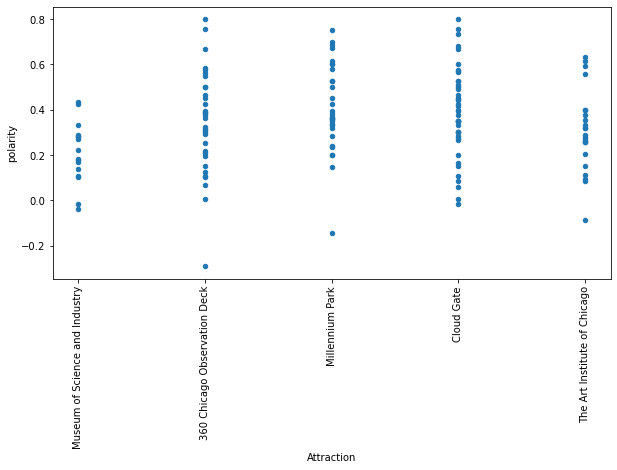

In [181]:
from textblob import TextBlob

sample_size = len(ta_loc_2.Attraction)

def sentiment_func(x):
    sentiment = TextBlob(x['Text'])
    x['polarity'] = sentiment.polarity
    x['subjectivity'] = sentiment.subjectivity
    return x

sample = ta_loc_2.sample(sample_size).apply(sentiment_func, axis=1)
sample.plot.scatter('Attraction', 'polarity').tick_params(axis='x', labelrotation = 90)

- We might be seeing that the reason why there are so many positive reviews in the top 5 count is that a lot of them went to Fenway
- we might want to consider how we market to different groups based on these grams

In [182]:
corpus_loc_2 = ' '.join(ta_loc_2['Text']).lower()
tokens_loc_2 = [lemmatizer.lemmatize(tokens) for tokens in word_tokenize(corpus_loc_2) if tokens not in stop_filters]

bigram_loc_2 = list(nltk.bigrams(tokens_loc_2))
fdist_bi_loc_2 = FreqDist(bigram_loc_2)
fdist_bi_loc_2.most_common(10)

[(('cloud', 'gate'), 12),
 (('millennium', 'park'), 11),
 (('great', 'view'), 9),
 (('must', 'see'), 8),
 (('view', 'city'), 7),
 (('art', 'institute'), 7),
 (('worth', 'visit'), 6),
 (('observation', 'deck'), 6),
 (('great', 'place'), 6),
 (('willis', 'tower'), 5)]

In [183]:
trigram_loc_2 = list(nltk.trigrams(tokens_loc_2))
fdist_tri_loc_2 = FreqDist(trigram_loc_2)
fdist_tri_loc_2.most_common(10)

[(('great', 'view', 'city'), 5),
 (('360', 'observation', 'deck'), 4),
 (('used', 'go', 'card'), 3),
 (('go', 'card', 'visit'), 3),
 (('bean', 'must', 'see'), 3),
 (('made', '94th', 'floor'), 2),
 (('360', 'degree', 'view'), 2),
 (('day', 'used', 'go'), 2),
 (('view', 'lake', 'michigan'), 2),
 (('lot', 'people', 'around'), 2)]